# Machine Learning Oral Body Tempreture Coursework

## Table of Contents:

### 1. Loading the Data:
#### Contains:
- 1.1 Analysing the data(viewing X and y)
- Importing necessary dependencies 
- 1.2 Checking for missing values and replacing them with the mean (Imputation)
- 1.3 Viewing the data's std,min,max and mean columns
- Identifying Categorical columns

### 2. Preprocessing
#### Contains:
- 2.1 Dealing with Categorical Columns
- 2.2 Visualising the data (Histograms and Boxplots)
- 2.3 Attempting to finding correlations between the columns using a Heatmap
- 2.4 Visualising correlations between Target column and my features

### 3. Cross Validation Split:
#### Contains:
- 3.1 Splitting the data into just Training and Test set (no validation set for now)

### 4. Regression Model Training:
#### Contains:
- 4.1 Training a Random Forest Model and evaluating it on different metrics (MAE, MSE, R^2 score and RMSE)
- Taking a look at the Feature Importances for both regression task (aveOralF and aveOralM)
- Finding the best hyperparameters for the Random Forest model using GridSearch
- Training the Random Forest Model with the best hyperparameters
- 4.2 SVR Model Training - finding the best hyperparameters
- 4.3 Simple Linear Regression model training with ElasticNet (includes plain Lasson and plain Ridge)
- Finding the best hyperparameters and best model out of: ElasticNet,Lasson and Ridge
- 4.4 MLP Training
- Training MLPs via keras tuner
- 4.5 Best Regression Model
- Conclusion on the best regression model
- Visualising the differences between Predicted and actual values for aveOralF and aveOralM 
- 4.6 Preparing data for the classification task and visualising the data - how many people actually have a fever and how many people do not
### 5. Classification Model Training:
#### Contains:
- 5.1 Splitting the data and Training a simple Binary Classifier
- 5.2 Training an XGBoost Classifier
- 5.3 Best Classification Model
### 6. Final Model Evaluation
- 6.1 Testing all Models on the same dataset
- 6.2 Comparing the Models and Conclusion

### Import Dependencies:

In [2]:
#Data manupulation libraries:
import pandas as pd
import numpy as np

#Visualising patterns in the data:
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Loading the Data:

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
infrared_thermography_temperature = fetch_ucirepo(id=925)

data = infrared_thermography_temperature.data
  
# data (as pandas dataframes) 
X = infrared_thermography_temperature.data.features # X values (features)
y = infrared_thermography_temperature.data.targets # Y values

### 1.1 Data Analysis:

- The data has 33 columns
- The dataset doesn't have missing values according to 'UCI Machine Learning Repository'

In [4]:
#view a small sample of the data:
X.sample(n=5)

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
741,Male,18-20,White,23.3,23.4,0.65,0.9475,36.6925,36.4675,36.2375,...,34.5425,35.2750,34.5875,34.7350,34.8775,36.0150,35.6500,36.9225,36.6725,36.7000
201,Male,21-25,Black or African-American,22.2,21.2,0.60,0.5550,35.5175,35.4075,34.6850,...,33.4450,33.7100,34.1350,33.6425,33.5750,34.8525,34.3700,35.8825,35.6400,35.7000
140,Female,18-20,White,25.2,22.0,0.79,1.0650,35.6300,35.2800,34.1525,...,34.7050,34.8275,34.6825,34.6975,34.2925,35.6750,35.4900,36.0075,35.8300,35.8650
871,Female,21-25,Multiracial,24.0,27.2,0.60,0.9400,35.7725,35.7775,35.1825,...,35.1600,35.2675,35.3525,35.2000,35.2800,35.8025,35.5925,36.2050,36.1775,36.1975
326,Male,26-30,Asian,26.9,23.9,0.78,0.7700,35.7175,36.0300,35.3600,...,34.8250,34.6400,34.5675,34.9050,34.7100,36.0075,35.4325,36.1625,35.4100,35.4550


In [5]:
# another quick look at the data:
X.info()
#5   Distance     1018 non-null   float64
#Distance contains 2 null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   object 
 1   Age          1020 non-null   object 
 2   Ethnicity    1020 non-null   object 
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float64
 18  T_LC_Max1    1020 non-null   float64
 19  RCC1  

- Columns that dont have numerical values (Categorical Columns): Gender, Age and Ethnicity

In [6]:
#quick  check:
non_numb_cols = X.select_dtypes(exclude=['int64', 'float64']).columns
print(non_numb_cols)

Index(['Gender', 'Age', 'Ethnicity'], dtype='object')


### 1.2 Imputation:
- Distance column had 2 missing values therefore they were filled with the mean of the column:

In [7]:
X.describe()#Visualise the standard deviation of the data:

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
count,1020.000000,1020.000000,1018.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,...,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,24.115392,28.723039,0.729784,0.968648,35.596533,35.611474,34.888475,35.011345,35.659921,35.587143,...,34.573865,34.567782,34.565340,34.487701,34.577293,35.421555,35.094144,36.084785,35.805519,35.838277
std,1.336338,13.071627,2.456486,0.362587,0.574888,0.549760,0.718613,0.633836,0.553897,0.569278,...,0.672461,0.669410,0.678663,0.668065,0.728678,0.523477,0.576045,0.491821,0.559258,0.559316
min,20.200000,9.900000,0.540000,-0.590000,33.897500,34.122500,31.770000,32.902500,33.985000,33.825000,...,31.050000,31.452500,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000
25%,23.400000,17.600000,0.600000,0.772500,35.247500,35.271875,34.456250,34.651250,35.332500,35.249375,...,34.213125,34.180000,34.177500,34.096875,34.225000,35.116875,34.756458,35.775000,35.474375,35.500000
50%,24.000000,26.300000,0.620000,0.940000,35.548750,35.575000,34.915000,34.997500,35.602500,35.533750,...,34.605000,34.597500,34.602500,34.512917,34.622500,35.391250,35.100000,36.027500,35.790000,35.825000
75%,24.700000,36.200000,0.700000,1.140000,35.872500,35.883125,35.300000,35.363125,35.910625,35.855625,...,34.965625,34.968125,34.965000,34.878125,35.012500,35.675000,35.415000,36.280000,36.087500,36.120625
max,29.100000,61.200000,79.000000,2.875000,38.405000,38.042500,37.575000,37.680000,38.385000,38.380000,...,37.125000,37.075000,37.165000,37.212500,37.367500,38.002500,37.632500,38.807500,38.417500,38.455000


#### Simple Evaluation of the X.describe() Figure:
#### Possible columns containing outliers (noise):
- Humidity because mean is 28.8 and the max value is 61.2 (only max value in this case seems like an outlier) as well as std is high
- Distance because mean is 0.73 and the max value is 79 (only max value in this case seems like an outlier) and the std is reasonably high


In [8]:
#Fill in the missing values in the Distance col with its mean values:
X.loc[:, 'Distance'] = X['Distance'].fillna(X['Distance'].mean())

In [9]:
#Check to see if distance still contains missing values:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   object 
 1   Age          1020 non-null   object 
 2   Ethnicity    1020 non-null   object 
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1020 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float64
 18  T_LC_Max1    1020 non-null   float64
 19  RCC1  

In [10]:
X.shape

(1020, 33)

### 1.3 View the target Column:

In [11]:
y.sample(n=5)

,aveOralF,aveOralM
635,36.60,36.74
753,38.15,38.69
697,37.60,37.94
1007,36.85,36.84
990,37.05,37.14


In [12]:
y.shape

(1020, 2)

## 2. Data Preprocessing:

- There are two ways to deal with the categorical columns:
1. Apply encodings to deal with the categorical columns (such as label encoding, one hot encoding ...)
2. Drop the columns altogether

#### Method 1 Encoding:
1. Dealing with the Gender column: To encode the gender column I have used one hot encoding - this type of encoding converts the Male and Female strings to 1s and 0s and since gender can only be of two values, one hot encoding will not create any additional columns
2. Dealing with the Ethnicity column: Used one hot encoding for the Ethnicity column, even though it did end up creating multiple extra columns.
3. Dealing with the Age column: To encode this column, I decided to use Label encoding because age itself has an order (ether younger to older or older to younger) and with this in mind label encoding can be used as it preserves the order of the age data which could contribute to finding certain patterns in the data.

#### Method 2 Dropping the Columns:
- Dropping the columns altogether can also be beneficial. This is because applying one hot encoding to such a small dataset (only 1020 rows) could negatively impact my model because one hot encoding would add multiple columns for each categorical feature in the data and having a large number of columns and small number of rows could make it very challenging finding patterns in the data for the models. For example the Ethnicity column contains around 5 different ethnicities, that means a minimum of 5 new columns will be addded to my dataset.

#### Conclusion:
- I will be using both methods and comparing the performance of the models to determine the best categorical data processing method


### 2.1 Dealing with the Categorical Columns:

#### Method 2 (Dropping the Columns) turned out to produce better results (See 4.5.2 for details)

In [13]:
#Dropping the Categorical Columns:
def cols_to_drop(data):
    cols = ['Age','Ethnicity','Gender']
    for col in cols:
        data = data.drop(col, axis=1)
    return data
X = cols_to_drop(X)

In [471]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
#Encoding Categorical Columns
def one_hot_cols(data):
    # One Hot Encoding Gender Column (only two values therefore the values can be set to 1 and 0)
    cat_encoder = OneHotEncoder(sparse_output=False, drop='first')
    gender_col = data['Gender'].values.reshape(-1, 1)
    data = data.drop(['Gender'], axis=1)
    
    gender_col_encoded = cat_encoder.fit_transform(gender_col)
    gender_col_df = pd.DataFrame(gender_col_encoded, columns=cat_encoder.get_feature_names_out(['Gender']))
    
    data = pd.concat([data, gender_col_df], axis=1)
    
    # One Hot encoding Ethnicity Column
    ethnicity_encoded = pd.get_dummies(data['Ethnicity'], prefix='Ethnicity')
    data = pd.concat([data, ethnicity_encoded], axis=1)
    data = data.drop(['Ethnicity'], axis=1)
        
    # Specifically for the age column, I will apply Label encoding (it will not create a lot of new columns):
    label_encoder = LabelEncoder()
    data['Age'] = label_encoder.fit_transform(data['Age'])
    
    return data

X = one_hot_cols(X)


In [543]:
#check that the cols were updated:
X_sample = X.iloc[:5]
print(X_sample)

   T_atm  Humidity  Distance  T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  \
0   24.0      28.0       0.8     0.7025    35.0300    35.3775      34.4000   
1   24.0      26.0       0.8     0.7800    34.5500    34.5200      33.9300   
2   24.0      26.0       0.8     0.8625    35.6525    35.5175      34.2775   
3   24.0      27.0       0.8     0.9300    35.2225    35.6125      34.3850   
4   24.0      27.0       0.8     0.8950    35.5450    35.6650      34.9100   

   aveAllL13_1    T_RC1  T_RC_Dry1  ...  T_FHCC1  T_FHRC1  T_FHLC1  T_FHBC1  \
0      34.9175  34.9850    34.9850  ...  33.5775  33.4775  33.3725  33.4925   
1      34.2250  34.7100    34.6325  ...  34.0325  34.0550  33.6775  33.9700   
2      34.8000  35.6850    35.6675  ...  34.9000  34.8275  34.6475  34.8200   
3      35.2475  35.2075    35.2000  ...  34.4400  34.4225  34.6550  34.3025   
4      35.3675  35.6025    35.4750  ...  35.0900  35.1600  34.3975  34.6700   

   T_FHTC1  T_FH_Max1  T_FHC_Max1   T_Max1    T_OR1  T_O

In [544]:
print(X.shape)

(1020, 30)


### 2.2 View the Data with Box Plots & Histograms:

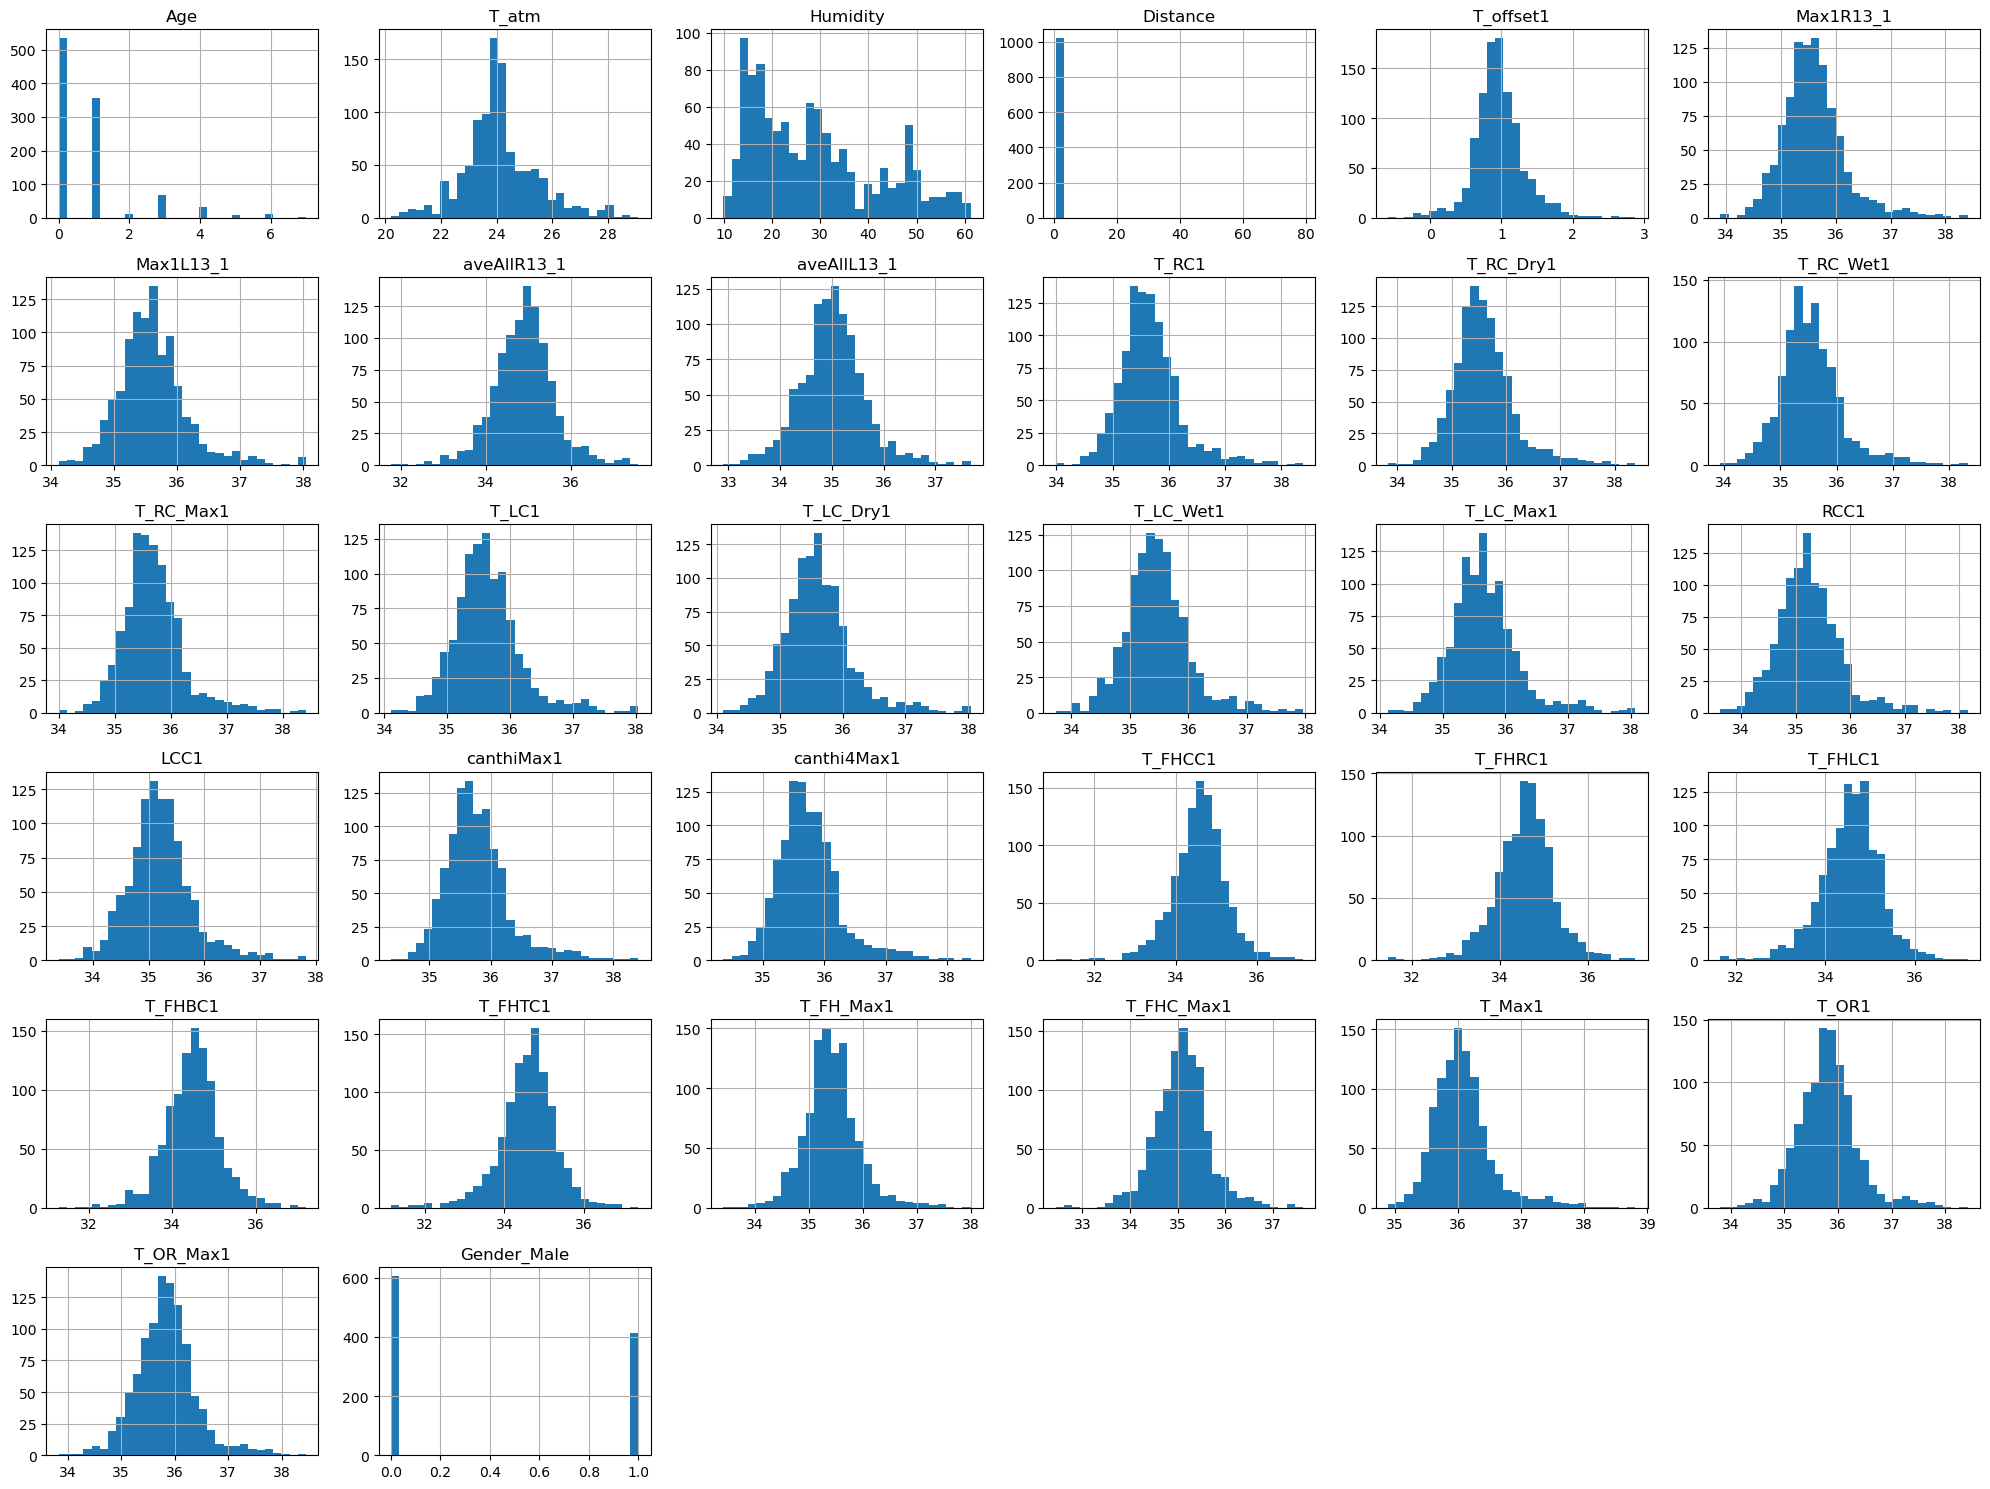

In [228]:
X.hist(bins=30, figsize=(20,15))
plt.tight_layout()
plt.show()

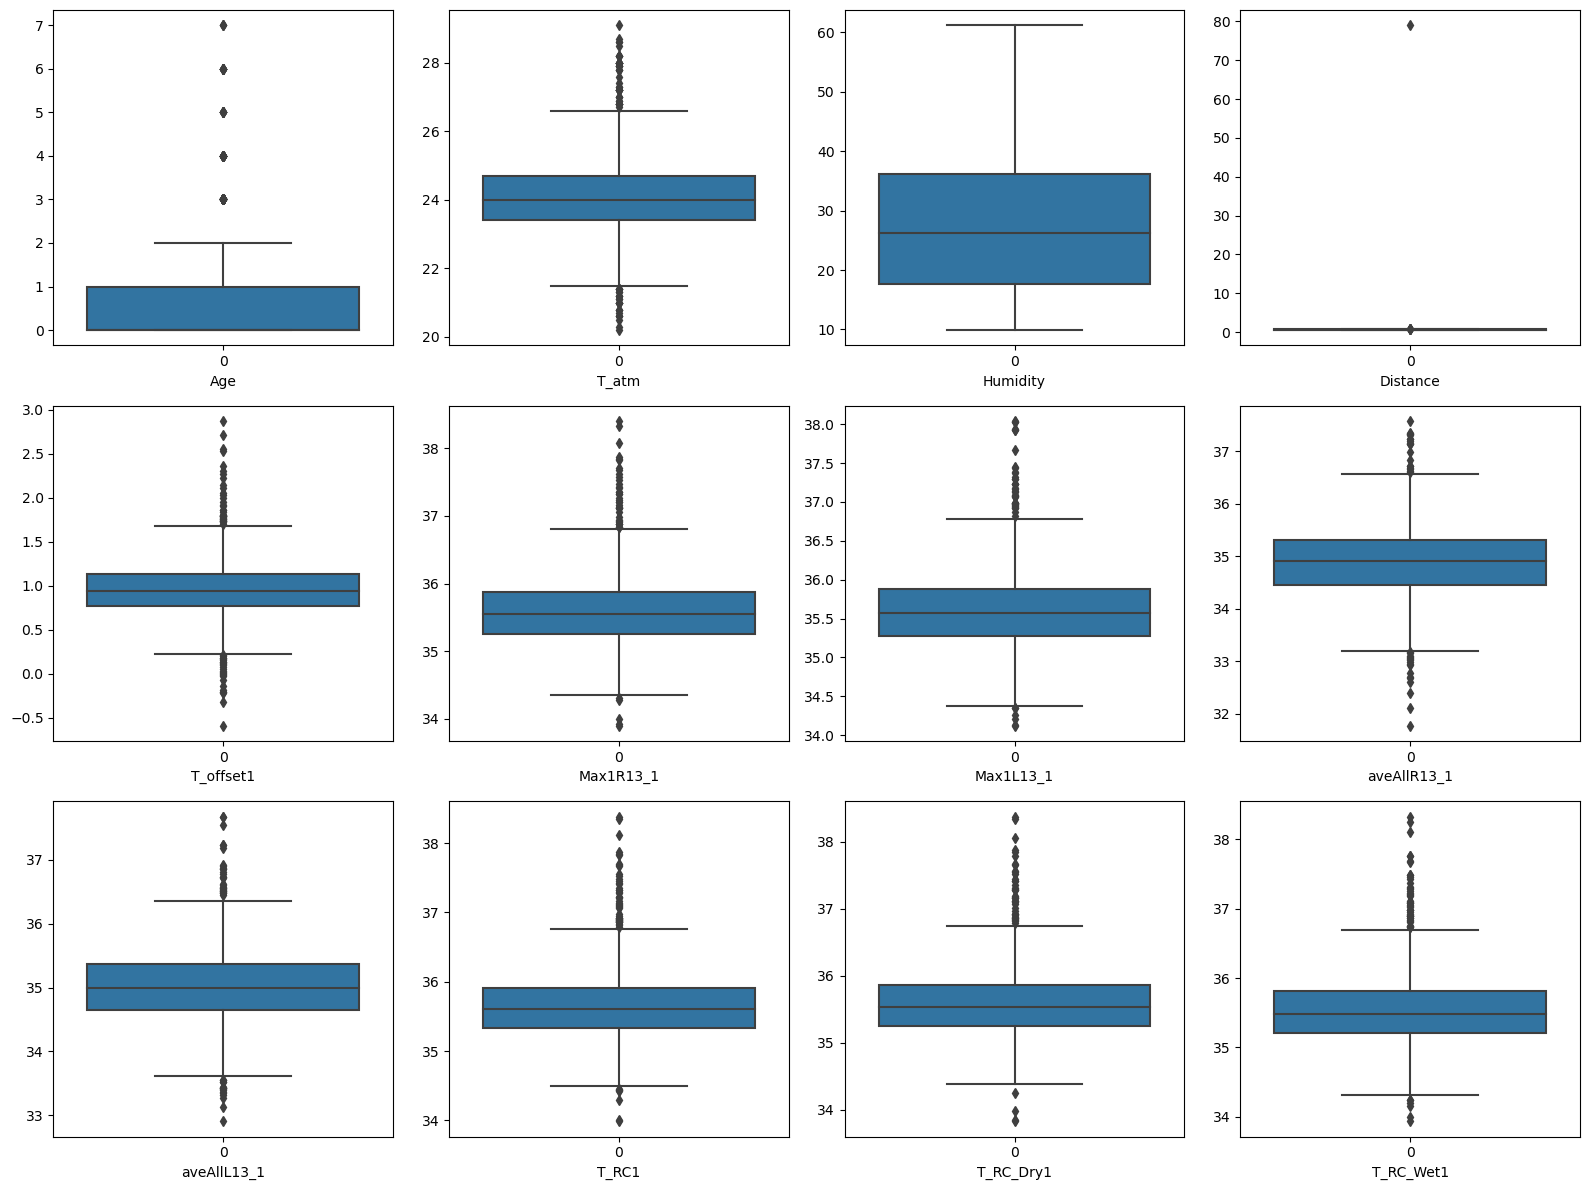

In [230]:
plt.figure(figsize=(16, 12))
num_subplots = min(len(X.columns), 12)#12 subplots - limit

for i in range(num_subplots):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(X[X.columns[i]])
    plt.xlabel(X.columns[i])#col name

plt.tight_layout()
plt.show()

### 2.3 Looking for Correlations in the data in the Heatmap below:
- From the heatmap the features that have the least linear correlations are: Distance and Humidity however, removing those features could have a negative effect on my model because sometimes there is a need for noise in the data to prevent the model from Overfitting.
- From the heatmap I also noticed a postive correlation between the two target columns (as aveOralF increases aveOralM also increases)
- Also it is clear that the following columns (in the heatmap) have very little correlation with the target columns (neither postive nor negative): Columns: Humidity, Distance, Gender and the other Ethnicity columns 
- Heatmap overall shows that there is very little negative correlations between the features (most features tempreture reading features have a postive correlation (as they are redish))

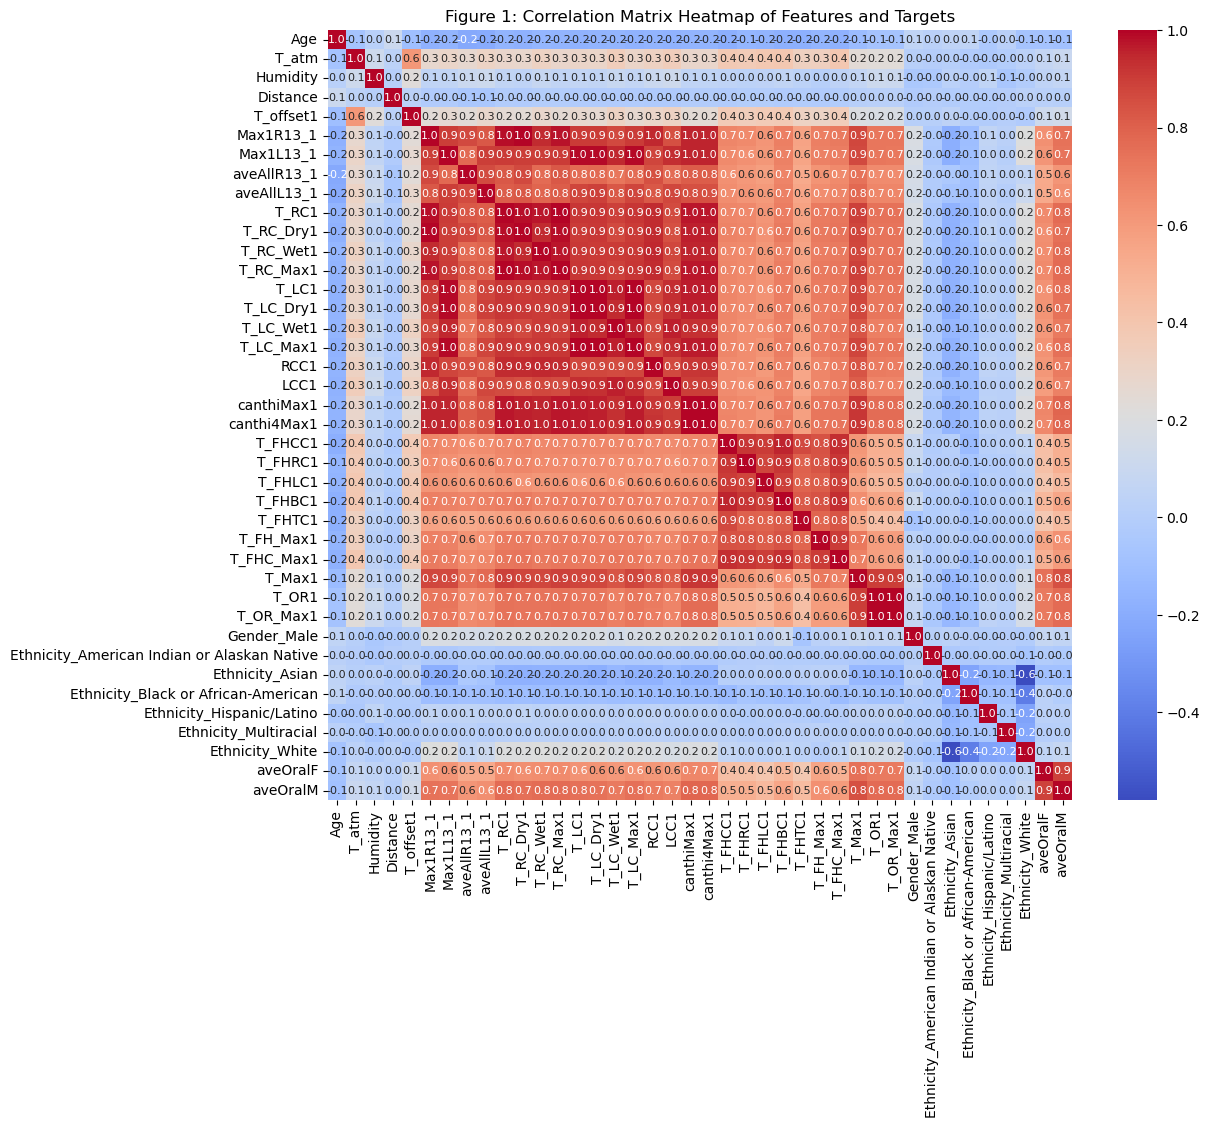

In [231]:
#Combine the X and y into a dataset with encoded labels:
dataset = pd.concat([X, y], axis=1)
corr_matrix = dataset.corr()
#Heatmap:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 8}, cmap='coolwarm', fmt=".1f")
plt.title('Figure 1: Correlation Matrix Heatmap of Features and Targets')
plt.show()

### 2.4 Correlation between Features and my target columns:

In [232]:
corr_matrix = dataset.corr()
corr_matrix["aveOralF"].sort_values(ascending=False)

aveOralF                                       1.000000
aveOralM                                       0.884728
T_Max1                                         0.752546
T_OR1                                          0.718840
T_OR_Max1                                      0.718513
canthiMax1                                     0.673136
canthi4Max1                                    0.672514
T_RC_Max1                                      0.664864
T_RC1                                          0.664154
T_RC_Wet1                                      0.654099
T_RC_Dry1                                      0.643588
Max1R13_1                                      0.637134
T_LC_Max1                                      0.633186
T_LC1                                          0.633009
T_LC_Dry1                                      0.627341
Max1L13_1                                      0.621410
RCC1                                           0.611695
T_LC_Wet1                                      0

In [233]:
corr_matrix = dataset.corr()
corr_matrix["aveOralM"].sort_values(ascending=False)

aveOralM                                       1.000000
aveOralF                                       0.884728
T_Max1                                         0.849657
canthiMax1                                     0.784096
canthi4Max1                                    0.783763
T_RC_Max1                                      0.769463
T_RC1                                          0.768730
T_OR1                                          0.767345
T_OR_Max1                                      0.766911
T_RC_Wet1                                      0.760134
T_LC_Max1                                      0.750527
T_LC1                                          0.750390
T_RC_Dry1                                      0.748566
T_LC_Dry1                                      0.743656
Max1R13_1                                      0.741902
Max1L13_1                                      0.735644
T_LC_Wet1                                      0.720383
RCC1                                           0

### 2.5 Correlation Evaluation:
- There are some columns that have a negative correlation to the target features such as Age and Ethnicities columns.
- This information doesn't tell me much, it would be better if I just trained a RFM and visualised the feature importance

## 3. Cross Validation Splits:

In [234]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_sample = X.iloc[:5]
print(X_sample)

(816, 38)
(204, 38)
(816, 2)
(204, 2)
   Age  T_atm  Humidity  Distance  T_offset1  Max1R13_1  Max1L13_1  \
0    5   24.0      28.0       0.8     0.7025    35.0300    35.3775   
1    4   24.0      26.0       0.8     0.7800    34.5500    34.5200   
2    2   24.0      26.0       0.8     0.8625    35.6525    35.5175   
3    2   24.0      27.0       0.8     0.9300    35.2225    35.6125   
4    0   24.0      27.0       0.8     0.8950    35.5450    35.6650   

   aveAllR13_1  aveAllL13_1    T_RC1  ...   T_Max1    T_OR1  T_OR_Max1  \
0      34.4000      34.9175  34.9850  ...  35.6925  35.6350    35.6525   
1      33.9300      34.2250  34.7100  ...  35.1750  35.0925    35.1075   
2      34.2775      34.8000  35.6850  ...  35.9125  35.8600    35.8850   
3      34.3850      35.2475  35.2075  ...  35.7200  34.9650    34.9825   
4      34.9100      35.3675  35.6025  ...  35.8950  35.5875    35.6175   

   Gender_Male  Ethnicity_American Indian or Alaskan Native  Ethnicity_Asian  \
0          1.0  

## 4 Regression Model Training:

- required to predict both the oral temperature measured in fast mode (aveOralF) and in monitor mode (aveOralM)
- Two Separate Models will be predicted: 1 for predicting the Fast Mode and 2 for predicting the Monitor Mode

### 4.1 Error function (Computes Errors):

In [24]:
#Function to calculate different Errors:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def errors(y_pred, y_acc):
    #compute the errors
    rmse = np.sqrt(mean_squared_error(y_acc, y_pred))
    mae = mean_absolute_error(y_acc, y_pred)
    score = r2_score(y_acc, y_pred)
    mse = mean_squared_error(y_acc, y_pred)
    errorsD = {'rmse':rmse, 'mae':mae, 'score':score, 'mse':mse}
    #displaying errors here - saves time
    print('RMSE:', errorsD['rmse'])
    print('Mean Absolute Error:', errorsD['mae'])
    print('R^2 Score:', errorsD['score'])
    print('Mean Squared Error:', errorsD['mse'])
    return None

### 4.1.1 Model 1 Random Forest Model:
- Main reason for training a random forest model is to identify useful features and patterns (Random Forest Model has a function that lets me view the feature importance)

In [236]:
#random forest model 1:
from sklearn.ensemble import RandomForestRegressor
#Initialising Random forest model:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
#Training a model that predicts only: aveOralF
forest_reg.fit(X_train, y_train['aveOralF'])
#Testing it:
y_pred_aveOralF = forest_reg.predict(X_test)#corresponding labels: y_test

#Compute Errors:
print('Errors for aveOralF:')
errorsF = errors(y_pred_aveOralF, y_test['aveOralF'])



#Training a model that predicts only: aveOralM
forest_reg.fit(X_train, y_train['aveOralM'])
#Testing it:
y_pred_aveOralM = forest_reg.predict(X_test)

#Compute Errors:
print('Errors for aveOralM:')
errorsM = errors(y_pred_aveOralM, y_test['aveOralM'])

Errors for aveOralF:
RMSE: 0.2680108714322647
Mean Absolute Error: 0.18230147058823465
R^2 Score: 0.6685581292800348
Mean Squared Error: 0.07182982720588192
Errors for aveOralM:
RMSE: 0.2640122731847089
Mean Absolute Error: 0.1988284313725477
R^2 Score: 0.8213816446470379
Mean Squared Error: 0.06970248039215735


### 4.1.2 Visualising the difference between Predicted and Actual Values:
Figures 2 and 3:
- For a model with 100% accuracy (very precise prediction), the points should be ploted in a straight line fashion. However, the line should not be completely straight as this would signify that the model is overfitting
- Comparing Figure 2 and Figure 3, it is clear that the pred vs acc values of aveOralM (Figure 3) fit a more linear pattern (better predicted compared to Figure 2)

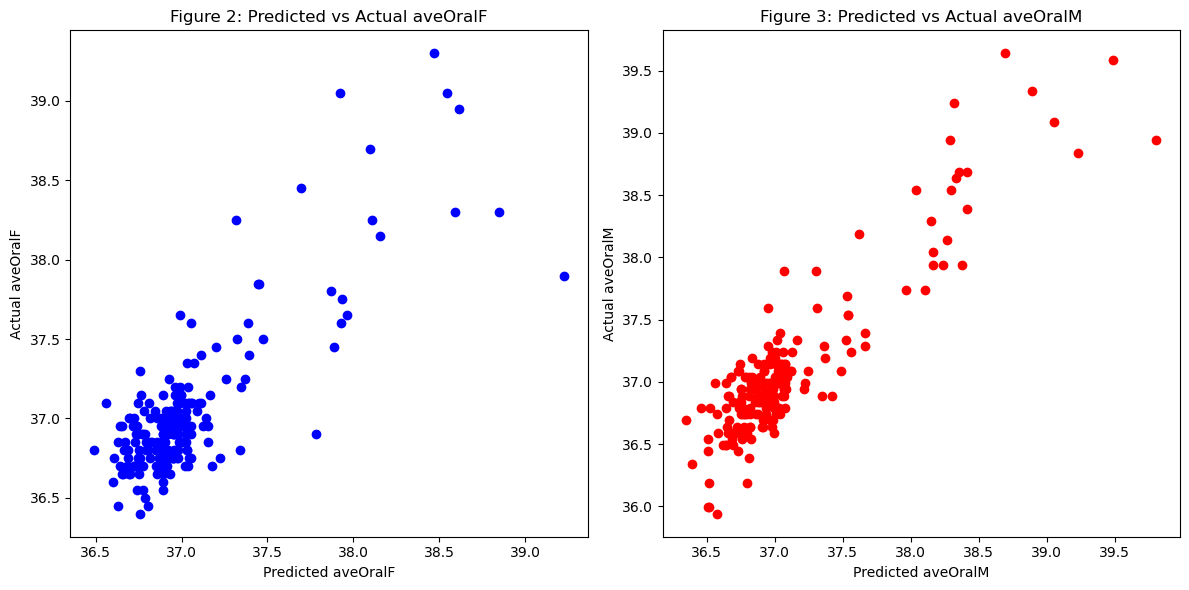

In [237]:
#Visualising the Difference between predicted and Actual:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#aveOralF:
axes[0].scatter(y_pred_aveOralF, y_test['aveOralF'], color='blue')
axes[0].set_xlabel('Predicted aveOralF')
axes[0].set_ylabel('Actual aveOralF')
axes[0].set_title('Figure 2: Predicted vs Actual aveOralF')

#aveOralM:
axes[1].scatter(y_pred_aveOralM, y_test['aveOralM'], color='red')
axes[1].set_xlabel('Predicted aveOralM')
axes[1].set_ylabel('Actual aveOralM')
axes[1].set_title('Figure 3: Predicted vs Actual aveOralM')

plt.tight_layout()
plt.show()

### 4.1.3 Feature importance from Random Forest 
- Figure 4 Shows that the Model has a broad selection of important features However the model in Figure 5 classifies mostly  based on the T_Max1 feature. I am not sure why this is the case. 

- To further inspect why Figure 5 Model predicts via the T_Max1 column I have inspected the column values: 
 1. The model's min is 34.89 and the max value is 38.8 and the mean is 36 - these values are very similar to values in the target columns and therefore are considered to be the most important by the random forest model
 
In the next sections I will be fine tuning the hyperparameters using Grid Search to find the most optimal values and experement with what happens to the model (only aveOralM model) after I drop the T_Max1 column

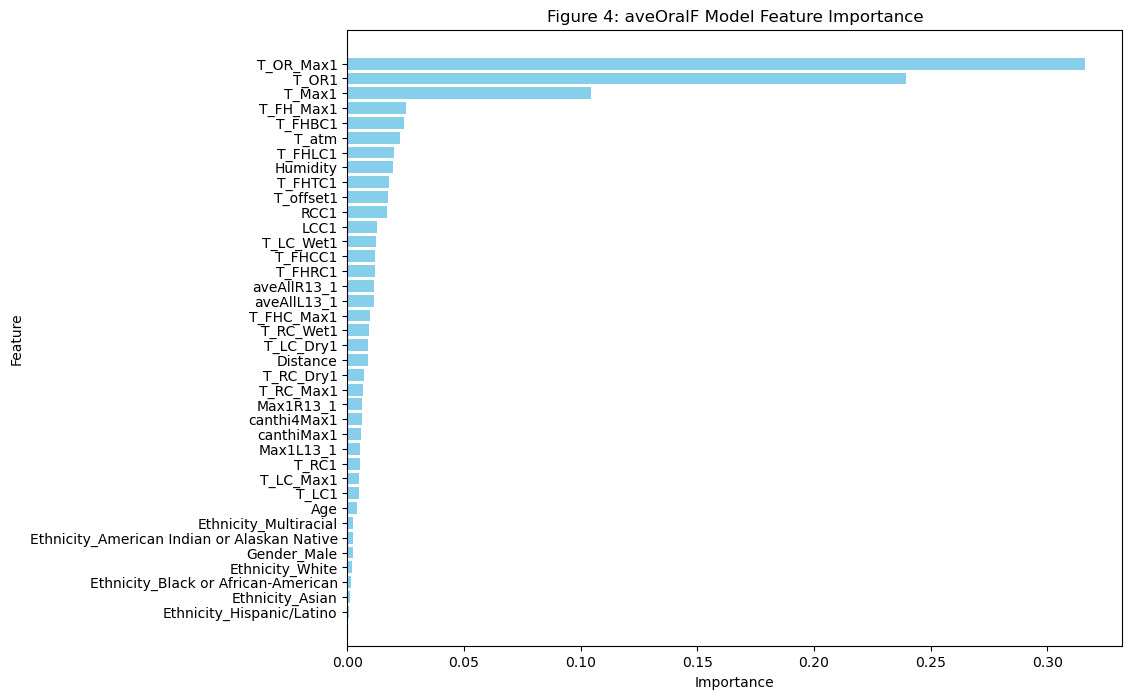

In [238]:
#Re-creating the RandomForest Model to predict aveOralF:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train['aveOralF'])

importances = forest_reg.feature_importances_
importance = pd.DataFrame({'importance':importances},index=X_train.columns)
importance_sorted = importance.sort_values(by='importance', ascending=True)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(importance_sorted.index, importance_sorted['importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Figure 4: aveOralF Model Feature Importance')
plt.show()

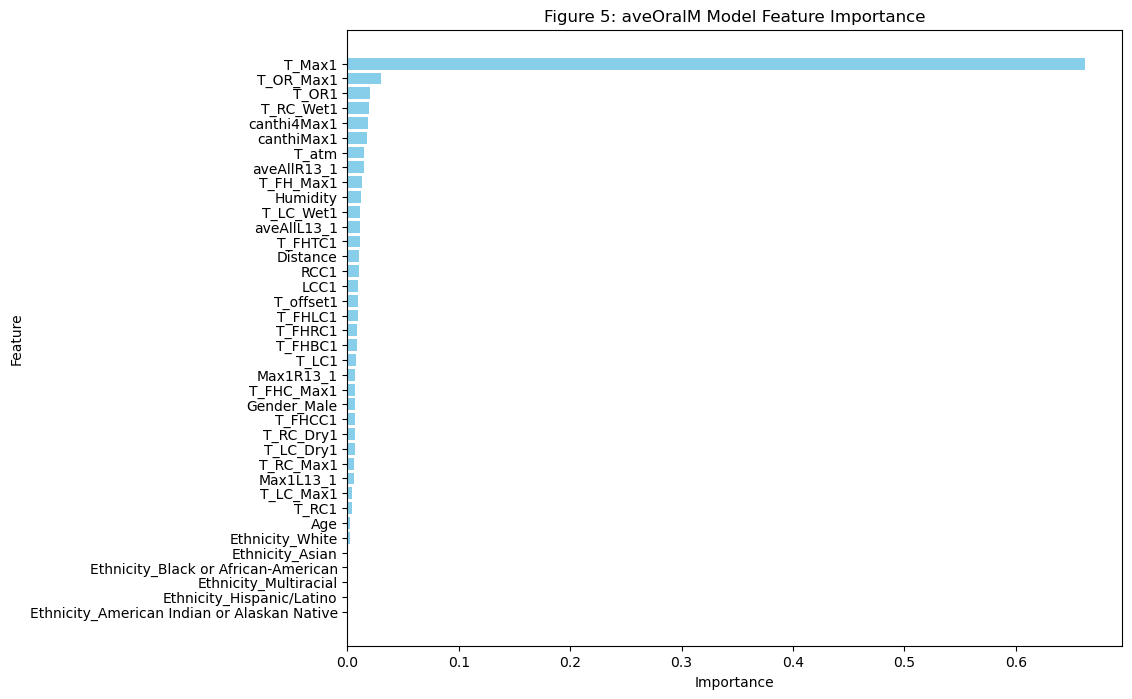

In [239]:
#Re-creating the RandomForest Model to predict aveOralF:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train['aveOralM'])

importances = forest_reg.feature_importances_
importance = pd.DataFrame({'importance':importances},index=X_train.columns)
importance_sorted = importance.sort_values(by='importance', ascending=True)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(importance_sorted.index, importance_sorted['importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Figure 5: aveOralM Model Feature Importance')
plt.show()

In [240]:
#Further look at feature importance (looking at the most important feature):
X['T_Max1'].describe()
#Conclusion:
# The model's min is 34.89 and the max value is 38.8 and the mean is 36
# These values are very similar to values in the target columns and therefore are considered to be the most important by the-
# random forest model

count    1020.000000
mean       36.084785
std         0.491821
min        34.892500
25%        35.775000
50%        36.027500
75%        36.280000
max        38.807500
Name: T_Max1, dtype: float64

### 4.1.4 Model 2 Random Forest Model Applying Grid Search:
- Finding the best models based on the lowest mean squared error

In [242]:
#Data: X_train, y_train  ||| X_test, y_test
from sklearn.model_selection import GridSearchCV
def GridS(X, y):
    params = {}
    #parameter grid:
    param_grid = {
        'n_estimators': [100, 200, 300,],
        'max_depth': [5, 10, 20, 30], 
    }

    #Initialising Random forest model:
    forest_reg = RandomForestRegressor(n_estimators=100, random_state=42,min_samples_leaf=2,min_samples_split=2)

    #Initialising Grid Search
    grid_search = GridSearchCV(estimator=forest_reg, param_grid=param_grid, cv=5,
                               scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

    #Best parameters for aveOralF:
    grid_search.fit(X, y['aveOralF'])
    params['aveOralF'] =  grid_search.best_params_

    #Best parameters for aveOralM:
    grid_search.fit(X, y['aveOralM'])
    params['aveOralM'] = grid_search.best_params_
    
    return params

In [243]:
#Calling the Functions:
params = GridS(X_train, y_train)
print("Best parameters for aveOralF:",params['aveOralF'])
print("Best parameters for aveOralM:",params['aveOralM'])
#Best parameters here:
# Best parameters for aveOralF: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
# Best parameters for aveOralM: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
# Taking a combination of both: max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for aveOralF: {'max_depth': 5, 'n_estimators': 300}
Best parameters for aveOralM: {'max_depth': 10, 'n_estimators': 200}


In [244]:
# Train the Second RandomForest Model:
from sklearn.ensemble import RandomForestRegressor

#Initialising Random forest model:
forest_reg = RandomForestRegressor(n_estimators=250, min_samples_split=2, min_samples_leaf=2, max_depth=5, random_state=42)

#Training a model that predicts only: aveOralF
forest_reg.fit(X_train, y_train['aveOralF'])
#Testing it:
y_pred_aveOralF = forest_reg.predict(X_test)#corresponding labels: y_test

#Compute Errors:
print('Errors for aveOralF:')
errorsF = errors(y_pred_aveOralF, y_test['aveOralF'])

#Training a model that predicts only: aveOralM
forest_reg.fit(X_train, y_train['aveOralM'])
#Testing it:
y_pred_aveOralM = forest_reg.predict(X_test)

#Compute Errors:
print('Errors for aveOralM:')
errorsM = errors(y_pred_aveOralM, y_test['aveOralM'])

Errors for aveOralF:
RMSE: 0.2625216812012008
Mean Absolute Error: 0.18009538233743985
R^2 Score: 0.6819957651433782
Mean Squared Error: 0.06891763310070491
Errors for aveOralM:
RMSE: 0.2593732104762009
Mean Absolute Error: 0.19328455136033582
R^2 Score: 0.8276036412485115
Mean Squared Error: 0.0672744623127316


### 4.1.5: Re-Visualising the Predictions for Both Models:
- Figures 6 and 7 Show the predicted vs actual values for the tuned Random Forest model. From the Figures it is not really clear how much the model has improved after tuning however, the Error metrics (MSE...) did show an improvement.

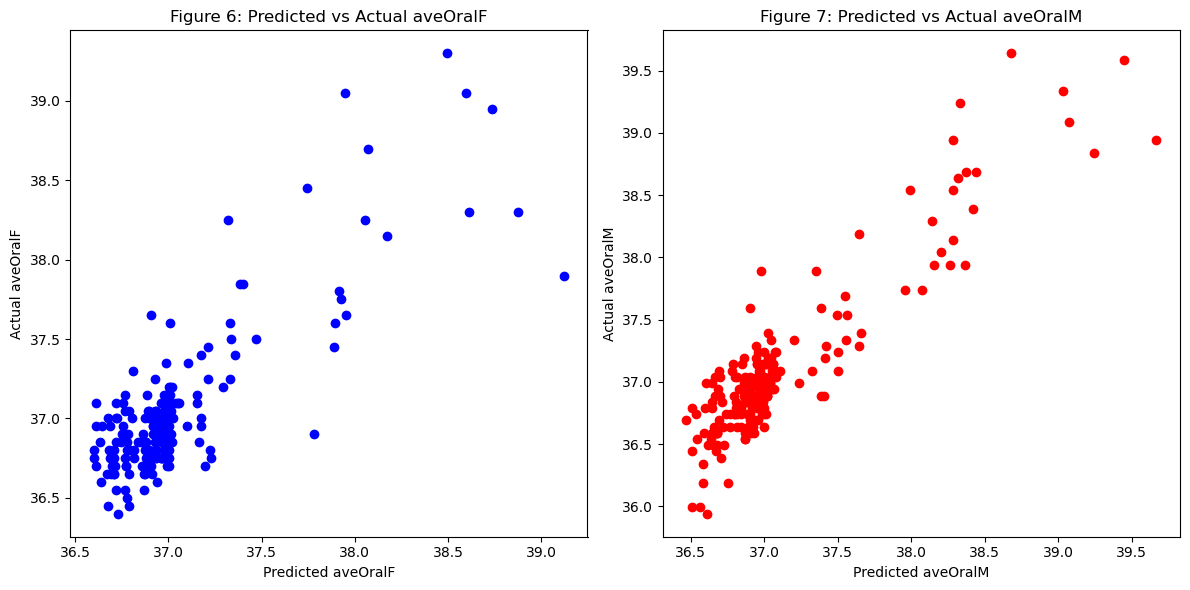

In [245]:
#Visualising the Difference between predicted and Actual:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#aveOralF:
axes[0].scatter(y_pred_aveOralF, y_test['aveOralF'], color='blue')
axes[0].set_xlabel('Predicted aveOralF')
axes[0].set_ylabel('Actual aveOralF')
axes[0].set_title('Figure 6: Predicted vs Actual aveOralF')

#aveOralM:
axes[1].scatter(y_pred_aveOralM, y_test['aveOralM'], color='red')
axes[1].set_xlabel('Predicted aveOralM')
axes[1].set_ylabel('Actual aveOralM')
axes[1].set_title('Figure 7: Predicted vs Actual aveOralM')

plt.tight_layout()
plt.show()

### 4.1.6 RandomForest Model Test (Removing the most important feature for aveOralM model:
- experement to see what features will be considered to be the most important when the most important feature is removed and how that will affect the model's performance:
- The error metrics below did show that there is a slight decrease in the r2 score and a slight increase in the MSE. Overall the performance of the model for aveOralM prediction has decreased

In [247]:
# Train the Second RandomForest Model:
from sklearn.ensemble import RandomForestRegressor

#Initialising Random forest model:
forest_reg = RandomForestRegressor(n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_depth=10, random_state=42)


#Dropping the 'T_Max1' column from both training and test data:
X_t = X_train.drop('T_Max1', axis=1)
x_t = X_test.drop('T_Max1', axis=1)


#Training a model that predicts only: aveOralF
forest_reg.fit(X_t, y_train['aveOralF'])
#Testing it:
y_pred_aveOralF = forest_reg.predict(x_t)#corresponding labels: y_test

#Compute Errors:
print('Errors for aveOralF:')
errorsF = errors(y_pred_aveOralF, y_test['aveOralF'])



#Training a model that predicts only: aveOralM
forest_reg.fit(X_t, y_train['aveOralM'])
#Testing it:
y_pred_aveOralM = forest_reg.predict(x_t)
#Compute Errors:
print('Errors for aveOralM:')
errorsM = errors(y_pred_aveOralM, y_test['aveOralM'])

Errors for aveOralF:
RMSE: 0.26424587685169454
Mean Absolute Error: 0.1802079632882925
R^2 Score: 0.6778048572577842
Mean Squared Error: 0.0698258834331209
Errors for aveOralM:
RMSE: 0.2776726676571524
Mean Absolute Error: 0.20771761929146193
R^2 Score: 0.802419482492604
Mean Squared Error: 0.07710211036383942


### 4.1.7 Feature Importance of the Test RandomForest Model:
- The feature importance distribution has increased (shown in Figure 8) after removing the most important feature from the model however both R2 scores has decreased for both tempretures that I am trying to predict. However, this doesn't matter since the performance of our model has decrease

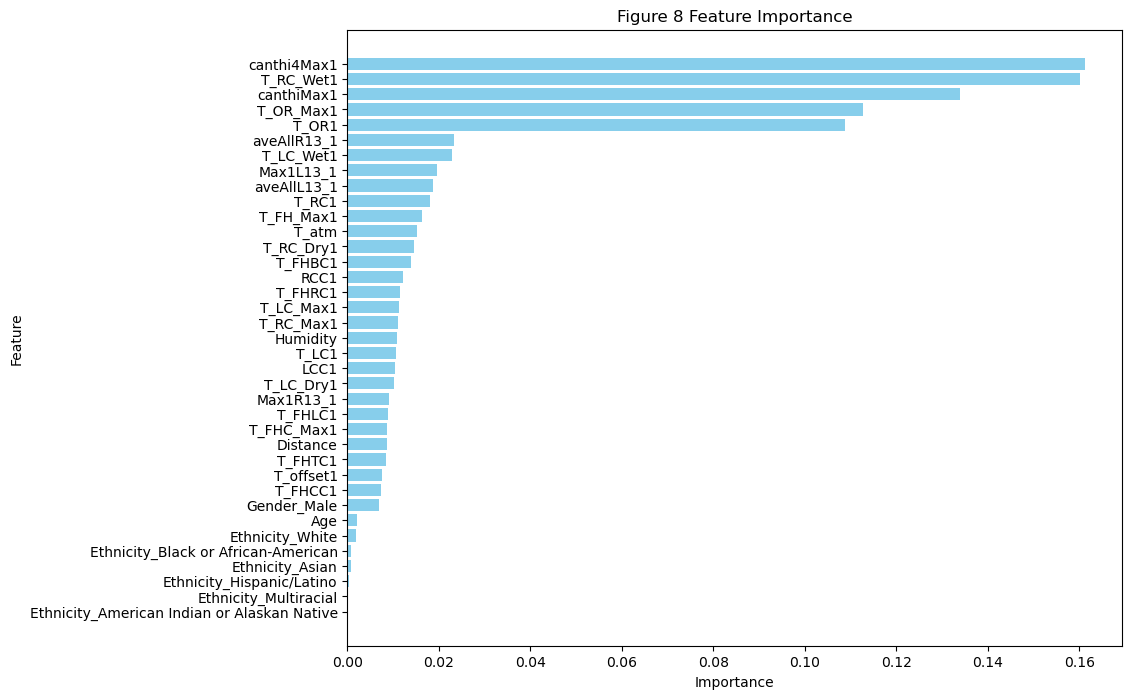

In [248]:
#Last model that was created was the aveOralM with the column droped therefore no need to re-run the model

importances = forest_reg.feature_importances_
importance = pd.DataFrame({'importance':importances},index=X_t.columns)
importance_sorted = importance.sort_values(by='importance', ascending=True)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(importance_sorted.index, importance_sorted['importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Figure 8 Feature Importance')
plt.show()

### 4.1.8 RandomForest Model Conclusion (on the Test set):
- Overall, even with the best hyperparameters for the RandomForest Model. The model's metrics were:

#### Best Metrics with Dropping the Categorical Columns:
- Errors for aveOralF:
1. RMSE: 0.264553809542582
2. Mean Absolute Error: 0.18185318347979768
3. R^2 Score: 0.6770534947232607
4. Mean Squared Error: 0.06998871814349276
- Errors for aveOralM:
1. RMSE: 0.26219272429709045
2. Mean Absolute Error: 0.19839542696008416
3. R^2 Score: 0.8238352038988668
4. Mean Squared Error: 0.06874502467433008

- That is without applying any addition alogorithms such as bagging and boosting

#### Best Metrics with Encoding the Categorical Columns:
- Errors for aveOralF:
1. RMSE: 0.2625216812012008
2. Mean Absolute Error: 0.18009538233743985
3. R^2 Score: 0.6819957651433782
4. Mean Squared Error: 0.06891763310070491
- Errors for aveOralM:
1. RMSE: 0.2593732104762009
2. Mean Absolute Error: 0.19328455136033582
3. R^2 Score: 0.8276036412485115
4. Mean Squared Error: 0.0672744623127316


#### Discussion on whether to drop the Categorical columns or to Encode them:
- When comparing the metrics after dropping the categorical columns to those after encoding them, there is a slight but noticeable difference. With the encoded approach, all errors have slightly decreased, and the R^2 score has also seen a slight increase compared to when the columns were dropped. Therefore, despite the feature importance analysis showing minimal correlation between the categorical features and the rest of the dataset, this subtle correlation could potentially improve our model's metrics.
- More Models will have to be compared to determine which method is better.

## 4.2 Regression Model Training Continued:

### 4.2.1  Model 2 : Support Vector Regressor (SVR):
- Training an alternative model to visualise whether there is any improvement in the performance:
- Main Objective is to achieve a higher score in prediciting aveOralF column since I already have a model which performs reasonably well when predicting aveOralM.

In [249]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C=100.0, gamma='scale')

#AVEORALF:
#train:
svr_model.fit(X_train, y_train['aveOralF'])
#predict:
y_pred_aveOralF = svr_model.predict(X_test)#corresponding labels: y_test
#Compute Errors:
print('Errors for aveOralF:')
errorsF = errors(y_pred_aveOralF, y_test['aveOralF'])



print("\n","\n")#separator
#AVEORALM:
#train:
svr_model.fit(X_train, y_train['aveOralM'])
#predict:
y_pred_aveOralM = svr_model.predict(X_test)#corresponding labels: y_test
#Compute Errors:
print('Errors for aveOralM:')
errorsF = errors(y_pred_aveOralF, y_test['aveOralM'])



Errors for aveOralF:
RMSE: 0.2836481129194395
Mean Absolute Error: 0.18795961785804455
R^2 Score: 0.6287535178774577
Mean Squared Error: 0.08045625196275909

 

Errors for aveOralM:
RMSE: 0.38659209682844325
Mean Absolute Error: 0.25125788066665067
R^2 Score: 0.6170132085544342
Mean Squared Error: 0.14945344933021243


### 4.2.2 Model 2 (SVR) Grid Search:

In [275]:
from sklearn.model_selection import GridSearchCV
def GridSearchSVR(X, y):
    params = {}
    
    param_grid = {'C': [1000,1500,2000,2500,3000,3500,4000,4500],
                  'gamma': ['scale', 'auto']}
    
    svr_model = SVR(kernel='rbf')
    grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    
    #Best parameters for aveOralF:
    grid_search.fit(X, y['aveOralF'])
    params['aveOralF'] =  grid_search.best_params_

    #Best parameters for aveOralM:
    grid_search.fit(X, y['aveOralM'])
    params['aveOralM'] = grid_search.best_params_
    
    return params

In [276]:
params = GridSearchSVR(X_train,y_train)
print("Best parameters for aveOralF:",params['aveOralF'])
print("Best parameters for aveOralM:",params['aveOralM'])
# Best parameters for aveOralF: {'C': 1200, 'gamma': 'scale'}
# Best parameters for aveOralM: {'C': 1200, 'gamma': 'scale'}

Best parameters for aveOralF: {'C': 4000, 'gamma': 'scale'}
Best parameters for aveOralM: {'C': 2000, 'gamma': 'scale'}


In [290]:
from sklearn.svm import SVR
#I am prioritising in creating a model that can predict reasonably well the aveOralF 
#therefore the hyperparameters are chosen to be {'C': 4000, 'gamma': 'scale'}
svr_model = SVR(kernel='rbf', C=4000, gamma='scale')

#AVEORALF:
#train:
svr_model.fit(X_train, y_train['aveOralF'])
#predict:
y_pred_aveOralF = svr_model.predict(X_test)#corresponding labels: y_test
#Compute Errors:
print('Errors for aveOralF:')
errorsF = errors(y_pred_aveOralF, y_test['aveOralF'])



print("\n","\n")#separator
#AVEORALM:
#train:
svr_model.fit(X_train, y_train['aveOralM'])
#predict:
y_pred_aveOralM = svr_model.predict(X_test)#corresponding labels: y_test
#Compute Errors:
print('Errors for aveOralM:')
errorsF = errors(y_pred_aveOralF, y_test['aveOralM'])

Errors for aveOralF:
RMSE: 0.3881397659214913
Mean Absolute Error: 0.2660675127010707
R^2 Score: 0.3048495166610242
Mean Squared Error: 0.15065247788959005

 

Errors for aveOralM:
RMSE: 0.418071770104952
Mean Absolute Error: 0.3003847900924076
R^2 Score: 0.5521015703877661
Mean Squared Error: 0.17478400495868782


### 4.2.3: Experemental Model with the Columns: [Distance, Humidity, T_atm and T_offset1] removed:
- Experement conclusion:
Removing the columns and evaluating how that will affect my model's performance
The performance of my model has droped significantly therefore it is better to keep the columns

In [278]:
def dropper(dataset, cols):
    for col in cols:
        dataset = dataset.drop(col, axis=1)
    dataset.info()#check to see if the cols were droped succesfully
    return dataset

from sklearn.svm import SVR
def experimentalModel(X_train, X_test):
    X_train = dropper(X_train, ['Distance', 'Humidity', 'T_atm', 'T_offset1'])
    X_test = dropper(X_test, ['Distance', 'Humidity', 'T_atm', 'T_offset1'])
    
    svr_model = SVR(kernel='rbf', C=500.0, gamma='scale')
    
    #AVEORALF:
    #train:
    svr_model.fit(X_train, y_train['aveOralF'])
    #predict:
    y_pred_aveOralF = svr_model.predict(X_test)
    #Compute Errors:
    print('Errors for aveOralF:')
    errorsF = errors(y_pred_aveOralF, y_test['aveOralF'])

    print("\n","\n")#separator
    #AVEORALM:
    #train:
    svr_model.fit(X_train, y_train['aveOralM'])
    #predict:
    y_pred_aveOralM = svr_model.predict(X_test)
    #Compute Errors:
    print('Errors for aveOralM:')
    errorsF = errors(y_pred_aveOralF, y_test['aveOralM'])
    
experimentalModel(X_train,X_test)

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 479 to 510
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Age                                          816 non-null    int32  
 1   Max1R13_1                                    816 non-null    float64
 2   Max1L13_1                                    816 non-null    float64
 3   aveAllR13_1                                  816 non-null    float64
 4   aveAllL13_1                                  816 non-null    float64
 5   T_RC1                                        816 non-null    float64
 6   T_RC_Dry1                                    816 non-null    float64
 7   T_RC_Wet1                                    816 non-null    float64
 8   T_RC_Max1                                    816 non-null    float64
 9   T_LC1                                        816 non-null    float64
 10  T_LC_

### 4.2.4 SVR Model Conclusion:
- Overall, even with the best hyperparameters for the SVR Model. The model's metrics were:

- Errors for aveOralF:
1. RMSE: 0.2599738218442589
2. Mean Absolute Error: 0.18015196740295422
3. R^2 Score: 0.6881384828560829
4. Mean Squared Error: 0.06758638804431044

- Errors for aveOralM:
1. RMSE: 0.328090636953064
2. Mean Absolute Error: 0.22911612671958692
3. R^2 Score: 0.7241547393537774
4. Mean Squared Error: 0.10764346605626725

- Again, these metrics are achieved without applying any addition alogorithms
- Comparison of this model to the previous Random Forest Model will be done at the end. Currently the two models are about equal when attempting to predict the aveOralF column. However the Random Forest is better at predicting the aveOralM column than the SVR Model

## 4.3 Regression Model Training Continued:

### 4.3.1 Simple Linear Regression Model Training:
- The values to predict have a clear linear pattern therefore Simple Linear Regression Model can be used 
- Training an alternative model to visualise whether there is any improvement in performance of the model

In [279]:
from sklearn.linear_model import LinearRegression

#AVEORALF:
#train:
model = LinearRegression().fit(X_train, y_train['aveOralF'])

#Predict:
y_pred_aveOralF = model.predict(X_test)


#Compute Errors
print('Errors for aveOralF:')
errors_aveOralF = errors(y_pred_aveOralF, y_test['aveOralF'])

#AVEORALM:
#train:
model = LinearRegression().fit(X_train, y_train['aveOralM'])

#Predict:
y_pred_aveOralM = model.predict(X_test)


#Compute Errors
print('Errors for aveOralM:')
errors_aveOralM = errors(y_pred_aveOralM, y_test['aveOralM'])


Errors for aveOralF:
RMSE: 0.2763881025358988
Mean Absolute Error: 0.19334419433441152
R^2 Score: 0.647514514436927
Mean Squared Error: 0.0763903832233945
Errors for aveOralM:
RMSE: 0.2719134625061624
Mean Absolute Error: 0.20617569777999842
R^2 Score: 0.810530515453502
Mean Squared Error: 0.07393693109209017


### 4.3.2 Tuning a Linear Regression Model (Elastic Net Model (Covering Both Lasso and Ridge)):
- Different Outcomes:
    Just Ridge (l1_ratio = 0): 
- Errors for aveOralF:
1. RMSE: 0.2840
2. Mean Absolute Error: 0.1931
3. R^2 Score: 0.6277
4. Mean Squared Error: 0.0807

- Errors for aveOralM:
1. RMSE: 0.2953
2. Mean Absolute Error: 0.2206
3. R^2 Score: 0.7768
4. Mean Squared Error: 0.0872

Just Lasso (l1_ratio = 1): Performed much poorer compared to Ridge, all of the metrics were significantly lower compared to ridge regression

Elastic net (l1_ratio = 0.5): Still performed poorer compared to Ridge

In [284]:
# l1_ratio=0.5 means we have 50% of Lasso and remaining 50% of Ridge. 
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0, random_state=42)

#AVEORALF:
#train:
model = elastic_net.fit(X_train, y_train['aveOralF'])

#Predict:
y_pred_aveOralF = model.predict(X_test)


#Compute Errors
print('Errors for aveOralF:')
errors_aveOralF = errors(y_pred_aveOralF, y_test['aveOralF'])

#AVEORALM:
#train:
model = elastic_net.fit(X_train, y_train['aveOralM'])

#Predict:
y_pred_aveOralM = model.predict(X_test)


#Compute Errors
print('Errors for aveOralM:')
errors_aveOralM = errors(y_pred_aveOralM, y_test['aveOralM'])


Errors for aveOralF:
RMSE: 0.28404146514839906
Mean Absolute Error: 0.19312591709602092
R^2 Score: 0.6277231434142041
Mean Squared Error: 0.0806795539236492
Errors for aveOralM:
RMSE: 0.2952738187739791
Mean Absolute Error: 0.2205697600592842
R^2 Score: 0.7765770741005743
Mean Squared Error: 0.08718662805336866


C:\Users\Dima\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.470e+01, tolerance: 1.069e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dima\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.003e+01, tolerance: 1.837e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_

### 4.3.3 Simple Linear Regression Model Conclusion:
- Overall, even with the best hyperparameters for the Simple Linear Regression Model. The model's metrics were:

- Errors for aveOralF:
1. RMSE: 0.2763881025358988
2. Mean Absolute Error: 0.19334419433441152
3. R^2 Score: 0.647514514436927
4. Mean Squared Error: 0.0763903832233945

- Errors for aveOralM:
1. RMSE: 0.2719134625061624
2. Mean Absolute Error: 0.20617569777999842
3. R^2 Score: 0.810530515453502
4. Mean Squared Error: 0.07393693109209017

- The simple linear regression model outperformed Lasso, Ridge, and ElasticNet models in terms of performance metrics.
- The error metrics for predicting aveOralF and aveOralM were not better when compared to the Random Forest Model and SVR.

## 4.4 Regression Model Training Continued:

### 4.4.1  Model 2 : MLP Training:
- Training an alternative model to visualise whether there is any improvement in the performance:
- Training a Neural Network would involve:
1. rescaling the values in the dataset
2. Spliting the data into training,testing and validation set
- I will also be using an alogrithm like Keras Tuner (RandomSearch) to build the best MLP model

#### Important Pattern recognised:
- If I drop the Categorical columns and train the MLP, it achieves a much better performance than if I encode the columns - this could be due to the fact that most of my data is Normalised but I have some columns that have values that are either 1 or 0 and MLPs are very sensitive to larger values. To overcome this issue, the MLPs will be trained on the dataset with the categorical Columns droped

### 4.4.2 Scaling data for MLP:
- I carried out a couple of own tests - best scaler so far was the MinMaxScaler

In [14]:
print(X.columns)

Index(['T_atm', 'Humidity', 'Distance', 'T_offset1', 'Max1R13_1', 'Max1L13_1',
       'aveAllR13_1', 'aveAllL13_1', 'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1',
       'T_RC_Max1', 'T_LC1', 'T_LC_Dry1', 'T_LC_Wet1', 'T_LC_Max1', 'RCC1',
       'LCC1', 'canthiMax1', 'canthi4Max1', 'T_FHCC1', 'T_FHRC1', 'T_FHLC1',
       'T_FHBC1', 'T_FHTC1', 'T_FH_Max1', 'T_FHC_Max1', 'T_Max1', 'T_OR1',
       'T_OR_Max1'],
      dtype='object')


In [15]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

def scaling(data):
    cols_to_scale = X.columns
    
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data[cols_to_scale])
    
    scaled_df = pd.DataFrame(scaled_data, columns=cols_to_scale, index=data.index)
    return scaled_df
#Combine the X and y 
X = scaling(X)

In [16]:
X

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
0,0.426966,0.352827,0.003314,0.373016,0.251248,0.320153,0.453058,0.421769,0.227273,0.254665,...,0.416049,0.360160,0.311394,0.372946,0.297949,0.244287,0.301878,0.204342,0.397075,0.393398
1,0.426966,0.313840,0.003314,0.395382,0.144759,0.101403,0.372093,0.276818,0.164773,0.177278,...,0.490947,0.462872,0.366773,0.453434,0.458786,0.277476,0.427540,0.072158,0.279523,0.275433
2,0.426966,0.313840,0.003314,0.419192,0.389351,0.355867,0.431955,0.397174,0.386364,0.404501,...,0.633745,0.600267,0.542896,0.596713,0.566144,0.421654,0.535869,0.260536,0.445829,0.443723
3,0.426966,0.333333,0.003314,0.438672,0.293955,0.380102,0.450474,0.490842,0.277841,0.301866,...,0.558025,0.528235,0.544258,0.509482,0.605951,0.477693,0.553683,0.211367,0.251896,0.248377
4,0.426966,0.333333,0.003314,0.428571,0.365502,0.393495,0.540913,0.515960,0.367614,0.362239,...,0.665021,0.659404,0.497503,0.571429,0.430639,0.437432,0.564757,0.256066,0.386782,0.385823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,0.617978,0.797271,0.000765,0.523088,0.387133,0.390306,0.531869,0.440084,0.401705,0.402305,...,0.667901,0.692752,0.679528,0.650232,0.663450,0.532100,0.636976,0.300128,0.406284,0.405844
1016,0.617978,0.797271,0.000765,0.593795,0.462562,0.417092,0.630060,0.480377,0.451136,0.466520,...,0.701235,0.669631,0.646845,0.662031,0.630478,0.513058,0.599422,0.410600,0.574215,0.574675
1017,0.876404,0.280702,0.000765,0.207792,0.556850,0.565689,0.706288,0.639979,0.551136,0.557080,...,0.721811,0.673633,0.648207,0.689001,0.674306,0.645811,0.629754,0.419540,0.468581,0.468074
1018,0.539326,0.582846,0.000765,0.529582,0.425402,0.357781,0.434970,0.231816,0.405682,0.408342,...,0.623868,0.634504,0.593282,0.579014,0.554081,0.436888,0.552720,0.247126,0.349404,0.346320


### 4.4.3 Quick Test How Sacling the Data Affects RandomForest Model:
- Testing the following hypothesis: Does Scaling the data produce better results (testing it on the Random Forest model because that model doesn't require the data to be scaled)?

In [319]:
### split data again:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_sample = X.iloc[:5]
print(X_sample)

(816, 38)
(204, 38)
(816, 2)
(204, 2)
        Age     T_atm  Humidity  Distance  T_offset1  Max1R13_1  Max1L13_1  \
0  0.714286  0.426966  0.352827  0.003314   0.373016   0.251248   0.320153   
1  0.571429  0.426966  0.313840  0.003314   0.395382   0.144759   0.101403   
2  0.285714  0.426966  0.313840  0.003314   0.419192   0.389351   0.355867   
3  0.285714  0.426966  0.333333  0.003314   0.438672   0.293955   0.380102   
4  0.000000  0.426966  0.333333  0.003314   0.428571   0.365502   0.393495   

   aveAllR13_1  aveAllL13_1     T_RC1  ...    T_Max1     T_OR1  T_OR_Max1  \
0     0.453058     0.421769  0.227273  ...  0.204342  0.397075   0.393398   
1     0.372093     0.276818  0.164773  ...  0.072158  0.279523   0.275433   
2     0.431955     0.397174  0.386364  ...  0.260536  0.445829   0.443723   
3     0.450474     0.490842  0.277841  ...  0.211367  0.251896   0.248377   
4     0.540913     0.515960  0.367614  ...  0.256066  0.386782   0.385823   

   Gender_Male  Ethnicity_Amer

In [288]:
#Calling the Grid Search Function:
params = GridS(X_train, y_train)
print("Best parameters for aveOralF:",params['aveOralF'])
print("Best parameters for aveOralM:",params['aveOralM'])

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for aveOralF: {'max_depth': 5, 'n_estimators': 300}
Best parameters for aveOralM: {'max_depth': 10, 'n_estimators': 200}


In [289]:
# Train the RandomForest Model:
from sklearn.ensemble import RandomForestRegressor

#Initialising Random forest model:
forest_reg = RandomForestRegressor(n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_depth=5, random_state=42)

#Training a model that predicts only: aveOralF
forest_reg.fit(X_train, y_train['aveOralF'])
#Testing it:
y_pred_aveOralF = forest_reg.predict(X_test)#corresponding labels: y_test

#Compute Errors:
print('Errors for aveOralF:')
errorsF = errors(y_pred_aveOralF, y_test['aveOralF'])

#Training a model that predicts only: aveOralM
forest_reg.fit(X_train, y_train['aveOralM'])
#Testing it:
y_pred_aveOralM = forest_reg.predict(X_test)

#Compute Errors:
print('Errors for aveOralM:')
errorsM = errors(y_pred_aveOralM, y_test['aveOralM'])

Errors for aveOralF:
RMSE: 0.26258855284330346
Mean Absolute Error: 0.18043666253220642
R^2 Score: 0.6818337352970154
Mean Squared Error: 0.06895274808434038
Errors for aveOralM:
RMSE: 0.2585332065910828
Mean Absolute Error: 0.19260219278112986
R^2 Score: 0.8287184758514998
Mean Squared Error: 0.06683941891026751


### 4.4.4 Quick Test Results (Testing whether the RFM is affected by the scales of the data):
- Scaling the data did not have much of an affect on the Random Forest Model's Performance. That is the model still performs at a roughly similar level. Therefore Scaling data was not necessary for the Random Forest Model.
- Only RFM was tested since it currently has the highest performance level out of all the models (SVR was outperformed for the aveOralM).

### 4.4.4 Applying Cross Validation Splits (Training, Validation and Test):

In [17]:
# This time Validation set was also added:
from sklearn.model_selection import train_test_split
# Spliting the data 80% train, 15% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
# Further split the training data (into training and validation sets) 75% train, 25% validation:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [710]:
X_train.shape

(650, 30)

In [711]:
X_val.shape

(217, 30)

### 4.4.5 Training the MLP Models Model 1:

In [712]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
model = keras.Sequential()
model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))#input shape set
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
# Output layer with 1 neuron (assuming the output is a single temperature value)
model.add(layers.Dense(1, activation='linear'))
    
# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3), loss="mse", metrics=["mae"])

In [713]:
hist = model.fit(X_train,y_train['aveOralF'],epochs=300,validation_data=(X_val,y_val['aveOralF']))

Epoch 1/300
21/21 [==============================] - 1s 9ms/step - loss: 1201.3705 - mae: 34.6231 - val_loss: 956.5856 - val_mae: 30.9069
Epoch 2/300
21/21 [==============================] - 0s 4ms/step - loss: 592.0142 - mae: 23.6255 - val_loss: 187.8454 - val_mae: 12.8163
Epoch 3/300
21/21 [==============================] - 0s 4ms/step - loss: 89.9520 - mae: 7.3997 - val_loss: 75.4309 - val_mae: 6.2980
Epoch 4/300
21/21 [==============================] - 0s 4ms/step - loss: 63.5379 - mae: 5.9889 - val_loss: 64.8957 - val_mae: 6.4697
Epoch 5/300
21/21 [==============================] - 0s 4ms/step - loss: 57.5107 - mae: 5.8299 - val_loss: 58.7596 - val_mae: 5.9195
Epoch 6/300
21/21 [==============================] - 0s 4ms/step - loss: 54.9070 - mae: 5.5728 - val_loss: 56.5771 - val_mae: 5.8976
Epoch 7/300
21/21 [==============================] - 0s 4ms/step - loss: 52.4405 - mae: 5.5073 - val_loss: 53.1560 - val_mae: 5.6788
Epoch 8/300
21/21 [==============================] - 0s 4ms/

Epoch 63/300
21/21 [==============================] - 0s 5ms/step - loss: 0.2954 - mae: 0.4104 - val_loss: 0.3412 - val_mae: 0.4359
Epoch 64/300
21/21 [==============================] - 0s 5ms/step - loss: 0.2841 - mae: 0.4100 - val_loss: 0.2834 - val_mae: 0.4058
Epoch 65/300
21/21 [==============================] - 0s 4ms/step - loss: 0.2734 - mae: 0.4012 - val_loss: 0.2855 - val_mae: 0.4140
Epoch 66/300
21/21 [==============================] - 0s 4ms/step - loss: 0.2601 - mae: 0.3899 - val_loss: 0.3357 - val_mae: 0.4687
Epoch 67/300
21/21 [==============================] - 0s 4ms/step - loss: 0.2966 - mae: 0.4239 - val_loss: 0.2974 - val_mae: 0.4370
Epoch 68/300
21/21 [==============================] - 0s 4ms/step - loss: 0.2555 - mae: 0.3912 - val_loss: 0.2332 - val_mae: 0.3730
Epoch 69/300
21/21 [==============================] - 0s 4ms/step - loss: 0.2249 - mae: 0.3662 - val_loss: 0.2219 - val_mae: 0.3615
Epoch 70/300
21/21 [==============================] - 0s 4ms/step - loss: 0.

Epoch 125/300
21/21 [==============================] - 0s 4ms/step - loss: 0.0850 - mae: 0.2232 - val_loss: 0.0596 - val_mae: 0.1909
Epoch 126/300
21/21 [==============================] - 0s 4ms/step - loss: 0.0750 - mae: 0.2057 - val_loss: 0.0546 - val_mae: 0.1795
Epoch 127/300
21/21 [==============================] - 0s 3ms/step - loss: 0.0856 - mae: 0.2198 - val_loss: 0.0757 - val_mae: 0.2154
Epoch 128/300
21/21 [==============================] - 0s 3ms/step - loss: 0.0964 - mae: 0.2348 - val_loss: 0.1599 - val_mae: 0.3456
Epoch 129/300
21/21 [==============================] - 0s 3ms/step - loss: 0.1047 - mae: 0.2459 - val_loss: 0.0622 - val_mae: 0.1937
Epoch 130/300
21/21 [==============================] - 0s 4ms/step - loss: 0.0786 - mae: 0.2064 - val_loss: 0.0572 - val_mae: 0.1871
Epoch 131/300
21/21 [==============================] - 0s 4ms/step - loss: 0.0760 - mae: 0.2042 - val_loss: 0.0528 - val_mae: 0.1783
Epoch 132/300
21/21 [==============================] - 0s 5ms/step - 

Epoch 248/300
21/21 [==============================] - 0s 4ms/step - loss: 0.0663 - mae: 0.1933 - val_loss: 0.0580 - val_mae: 0.1893
Epoch 249/300
21/21 [==============================] - 0s 4ms/step - loss: 0.0564 - mae: 0.1755 - val_loss: 0.0406 - val_mae: 0.1562
Epoch 250/300
21/21 [==============================] - 0s 4ms/step - loss: 0.0620 - mae: 0.1827 - val_loss: 0.0528 - val_mae: 0.1796
Epoch 251/300
21/21 [==============================] - 0s 4ms/step - loss: 0.0798 - mae: 0.2175 - val_loss: 0.0586 - val_mae: 0.1927
Epoch 252/300
21/21 [==============================] - 0s 4ms/step - loss: 0.0619 - mae: 0.1848 - val_loss: 0.0415 - val_mae: 0.1582
Epoch 253/300
21/21 [==============================] - 0s 4ms/step - loss: 0.0583 - mae: 0.1779 - val_loss: 0.0402 - val_mae: 0.1554
Epoch 254/300
21/21 [==============================] - 0s 4ms/step - loss: 0.0554 - mae: 0.1717 - val_loss: 0.0406 - val_mae: 0.1563
Epoch 255/300
21/21 [==============================] - 0s 4ms/step - 

In [715]:
y_pred = model.predict(X_test)
errors(y_pred,y_test['aveOralF'])

5/5 [==============================] - 0s 2ms/step
RMSE: 0.22825969538580654
Mean Absolute Error: 0.17578268113479145
R^2 Score: 0.637536730468545
Mean Squared Error: 0.05210248853762119


### 4.4.6 Training the MLP Models Model 2:

In [716]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
#Early stopping added:
from tensorflow.keras.callbacks import EarlyStopping

#Early Stopping:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Building the Model:
model_three = keras.Sequential()
model_three.add(layers.InputLayer(input_shape=(X_train.shape[1],)))#input shape set
model_three.add(layers.Dense(256*2, activation='relu'))
model_three.add(layers.Dense(256, activation='relu'))
model_three.add(layers.Dense(128, activation='relu'))
# Output layer with 1 neuron (assuming the output is a single temperature value)
model_three.add(layers.Dense(1, activation='linear'))
    
# Compile the model
model_three.compile(optimizer=Adam(learning_rate=1e-3), loss="mse", metrics=["mae"])

# Model Fitting:
model_three.fit(X_train,y_train['aveOralF'],epochs=300,validation_data=(X_val,y_val['aveOralF']), callbacks=[early_stopping])

#Testing the model:
y_pred = model_three.predict(X_test)
errors(y_pred,y_test['aveOralF'])

Epoch 1/300
21/21 [==============================] - 1s 11ms/step - loss: 953.0052 - mae: 29.9797 - val_loss: 100.9035 - val_mae: 8.8291
Epoch 2/300
21/21 [==============================] - 0s 6ms/step - loss: 98.5772 - mae: 7.7012 - val_loss: 91.3780 - val_mae: 8.3239
Epoch 3/300
21/21 [==============================] - 0s 6ms/step - loss: 59.9475 - mae: 6.0147 - val_loss: 56.9139 - val_mae: 6.0003
Epoch 4/300
21/21 [==============================] - 0s 6ms/step - loss: 56.8632 - mae: 5.8451 - val_loss: 47.9823 - val_mae: 5.2979
Epoch 5/300
21/21 [==============================] - 0s 6ms/step - loss: 43.2964 - mae: 5.0411 - val_loss: 40.2795 - val_mae: 4.9241
Epoch 6/300
21/21 [==============================] - 0s 6ms/step - loss: 36.6640 - mae: 4.6422 - val_loss: 35.8889 - val_mae: 4.8731
Epoch 7/300
21/21 [==============================] - 0s 7ms/step - loss: 28.4002 - mae: 4.1632 - val_loss: 26.4375 - val_mae: 4.0994
Epoch 8/300
21/21 [==============================] - 0s 6ms/step 

Epoch 63/300
21/21 [==============================] - 0s 5ms/step - loss: 0.1417 - mae: 0.2910 - val_loss: 0.1219 - val_mae: 0.2782
Epoch 64/300
21/21 [==============================] - 0s 5ms/step - loss: 0.1532 - mae: 0.3163 - val_loss: 0.1011 - val_mae: 0.2505
Epoch 65/300
21/21 [==============================] - 0s 5ms/step - loss: 0.0925 - mae: 0.2295 - val_loss: 0.1086 - val_mae: 0.2632
Epoch 66/300
21/21 [==============================] - 0s 5ms/step - loss: 0.1168 - mae: 0.2624 - val_loss: 0.0808 - val_mae: 0.2212
Epoch 67/300
21/21 [==============================] - 0s 5ms/step - loss: 0.0918 - mae: 0.2298 - val_loss: 0.0764 - val_mae: 0.2174
Epoch 68/300
21/21 [==============================] - 0s 5ms/step - loss: 0.0875 - mae: 0.2200 - val_loss: 0.0827 - val_mae: 0.2279
Epoch 69/300
21/21 [==============================] - 0s 5ms/step - loss: 0.0818 - mae: 0.2168 - val_loss: 0.1682 - val_mae: 0.3415
Epoch 70/300
21/21 [==============================] - 0s 5ms/step - loss: 0.

Epoch 125/300
21/21 [==============================] - 0s 5ms/step - loss: 0.0999 - mae: 0.2374 - val_loss: 0.1342 - val_mae: 0.3029
Epoch 126/300
21/21 [==============================] - 0s 5ms/step - loss: 0.0825 - mae: 0.2163 - val_loss: 0.0461 - val_mae: 0.1677
Epoch 127/300
21/21 [==============================] - 0s 5ms/step - loss: 0.0964 - mae: 0.2392 - val_loss: 0.0447 - val_mae: 0.1676
Epoch 128/300
21/21 [==============================] - 0s 5ms/step - loss: 0.0779 - mae: 0.2083 - val_loss: 0.0895 - val_mae: 0.2482
Epoch 129/300
21/21 [==============================] - 0s 5ms/step - loss: 0.0868 - mae: 0.2269 - val_loss: 0.0755 - val_mae: 0.2246
Epoch 130/300
5/5 [==============================] - 0s 2ms/step
RMSE: 0.23788891226012104
Mean Absolute Error: 0.18052700267118602
R^2 Score: 0.6063104039606382
Mean Squared Error: 0.05659113457630357


### 4.4.7 Keras Tuner to find the best Hyperparameters for the MLP (Specifically aveOralF):

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from tensorflow.keras.optimizers import Adam

#Building the Model To tune:
def build_model(hp):
    #Fixed:
    model = keras.Sequential()
    #input shape set
    model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))
    
    #Multiple Layers (to find optimal number of layers):
    for i in range(hp.Int('layers',2,4)):
        model.add(layers.Dense(units=hp.Int('units_'+str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    # Output layer with 1 neuron (assuming the output is a single temperature value)
    model.add(layers.Dense(1, activation='linear'))
    
    #Compiling the Model:
    model.compile(optimizer=Adam(
        hp.Choice('learning_rate',values=[1e-2,1e-3,1e-4])), 
                  loss="mse", 
                  metrics=["mse"])
    return model


tuner = RandomSearch(
    build_model,
    objective='mse',
    max_trials=100, #number of models to try
    #saving the weights of the best model:
    directory='keras_tuner',
    project_name='mlp_optimization_aveOralF')

C:\Users\Dima\AppData\Local\Temp\ipykernel_29460\3004761637.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


Reloading Tuner from keras_tuner\mlp_optimization_aveOralF\tuner0.json


In [20]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 4, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}


### 4.4.8 Training the Model to find the best MLP Parameters to predict aveOralF:

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
#early stopping  (similar to model above just the patience is larger - 15):
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

#Searching for best hyperparameters with early stopping
tuner.search(X_train,y_train['aveOralF'],
            epochs=300,
            validation_data=(X_val,y_val['aveOralF']),
            callbacks=[early_stopping])
best_model = tuner.get_best_models(num_models=1)[0]

In [22]:
#Viewing the best models to visualise any patterns:
tuner.results_summary()

Results summary
Results in keras_tuner\mlp_optimization_aveOralF
Showing 10 best trials
Objective(name="mse", direction="min")

Trial 004 summary
Hyperparameters:
layers: 3
units_0: 224
units_1: 96
learning_rate: 0.001
units_2: 224
units_3: 96
Score: 0.05154251679778099

Trial 073 summary
Hyperparameters:
layers: 3
units_0: 64
units_1: 192
learning_rate: 0.001
units_2: 256
units_3: 192
Score: 0.05425525829195976

Trial 031 summary
Hyperparameters:
layers: 2
units_0: 128
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 256
Score: 0.05546469986438751

Trial 008 summary
Hyperparameters:
layers: 2
units_0: 256
units_1: 256
learning_rate: 0.001
units_2: 32
units_3: 32
Score: 0.056038953363895416

Trial 086 summary
Hyperparameters:
layers: 3
units_0: 160
units_1: 32
learning_rate: 0.001
units_2: 224
units_3: 192
Score: 0.056786488741636276

Trial 076 summary
Hyperparameters:
layers: 2
units_0: 224
units_1: 192
learning_rate: 0.001
units_2: 64
units_3: 96
Score: 0.057067230343818665

Tr

In [26]:
y_pred = best_model.predict(X_test)
errors(y_pred, y_test['aveOralF'])
#Saving the Best MLP model for aveOralF
mlp_aveOralF = best_model

5/5 [==============================] - 0s 1ms/step
RMSE: 0.23340023247807556
Mean Absolute Error: 0.17561798594356395
R^2 Score: 0.6210271433060118
Mean Squared Error: 0.05447566852081972


### 4.4.9 Training the Model to find the best MLP Parameters to predict aveOralM:

In [727]:
tuner = RandomSearch(
    build_model,
    objective='mse',
    max_trials=100, #number of models to try
    directory='keras_tuner',
    project_name='mlp_optimization_aveOralM')

In [728]:
from tensorflow.keras.callbacks import EarlyStopping
#early stopping  (similar to model above just the patience is larger - 15):
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

#Searching for best hyperparameters with early stopping
tuner.search(X_train,y_train['aveOralM'],
            epochs=300,
            validation_data=(X_val,y_val['aveOralM']),
            callbacks=[early_stopping])
best_model = tuner.get_best_models(num_models=1)[0]

Trial 100 Complete [00h 00m 14s]
mse: 0.0739235132932663

Best mse So Far: 0.06229240447282791
Total elapsed time: 00h 41m 12s


In [729]:
#Viewing the best models to visualise any patterns:
tuner.results_summary()

Results summary
Results in keras_tuner\mlp_optimization_aveOralM
Showing 10 best trials
Objective(name="mse", direction="min")

Trial 016 summary
Hyperparameters:
layers: 3
units_0: 256
units_1: 224
learning_rate: 0.001
units_2: 32
units_3: 96
Score: 0.06229240447282791

Trial 091 summary
Hyperparameters:
layers: 4
units_0: 224
units_1: 256
learning_rate: 0.001
units_2: 256
units_3: 96
Score: 0.06290687620639801

Trial 053 summary
Hyperparameters:
layers: 3
units_0: 160
units_1: 32
learning_rate: 0.001
units_2: 64
units_3: 224
Score: 0.06330801546573639

Trial 051 summary
Hyperparameters:
layers: 2
units_0: 224
units_1: 192
learning_rate: 0.001
units_2: 96
units_3: 160
Score: 0.06366559118032455

Trial 017 summary
Hyperparameters:
layers: 2
units_0: 224
units_1: 96
learning_rate: 0.001
units_2: 256
units_3: 224
Score: 0.06413116306066513

Trial 048 summary
Hyperparameters:
layers: 4
units_0: 224
units_1: 224
learning_rate: 0.001
units_2: 32
units_3: 96
Score: 0.06415247172117233

Trial

In [736]:
y_pred = best_model.predict(X_test)
errors(y_pred, y_test['aveOralM'])
#Saving the Best MLP model for aveOralM
mlp_aveOralM = best_model

5/5 [==============================] - 0s 2ms/step
RMSE: 0.251623776301025
Mean Absolute Error: 0.18657139597375408
R^2 Score: 0.7165118882360958
Mean Squared Error: 0.06331452479998827


### 4.4.10 Training MLPs Conclusion:
- Training 100 model (to find the best parameters) with:
1. Different Number of hidden layers
2. Different Learning rate
3. Different Number of Nodes per hidden layer
4. Same Activation Function (for hidden layers)
5. Same Optimiser - Adam
6. Early Stopping

#### The Models achieved the following results on the Test Set (With the Categorical Columns DROPED):

aveOralF had the following metrics after evaluation:
1. RMSE: 0.2284456550572207
2. Mean Absolute Error: 0.1761206882451877
3. R^2 Score: 0.6369459033695517
4. Mean Squared Error: 0.052187417314522665

aveOralM had the following metrics after evaluation:
1. RMSE: 0.25484455498289327
2. Mean Absolute Error: 0.1882161238925908
3. R^2 Score: 0.7092081587875579
4. Mean Squared Error: 0.0649457472044289

#### The Models achieved the following results on the Test Set (With the Categorical Columns Encoded):

- aveOralF had the following metrics after evaluation:
1. RMSE: 0.4357601205765262
2. Mean Absolute Error: 0.33547436583275897
3. R^2 Score: -0.32099295582390464
4. Mean Squared Error: 0.18988688268486864

- aveOralM had the following metrics after evaluation:
1. RMSE: 0.37751182982127807
2. Mean Absolute Error: 0.29385417364781186
3. R^2 Score: 0.3618942908803767
4. Mean Squared Error: 0.14251518165500962

#### Conclusion regarding which models are better:
- The models with the Categorical columns droped outperformed the models with the Categorical columns encoded on the test set
### Structures of the best Models:

In [731]:
mlp_aveOralF.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 224)               6944      
                                                                 
 dense_1 (Dense)             (None, 96)                21600     
                                                                 
 dense_2 (Dense)             (None, 224)               21728     
                                                                 
 dense_3 (Dense)             (None, 1)                 225       
                                                                 
Total params: 50497 (197.25 KB)
Trainable params: 50497 (197.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [732]:
mlp_aveOralM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7936      
                                                                 
 dense_1 (Dense)             (None, 224)               57568     
                                                                 
 dense_2 (Dense)             (None, 32)                7200      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 72737 (284.13 KB)
Trainable params: 72737 (284.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [733]:
import matplotlib.pyplot as plt
#Figure 9 for plotting the difference between the actual values and the predicted values
def fig9(pred,acc, num):
    target = ''
    if(num == 9):
        target = 'aveOralF'
    else:
        target = 'aveOralM'
    differences = pred.flatten() - acc
    plt.figure(figsize=(10, 6))
    plt.scatter(acc, differences, color='red')
    plt.axhline(y=0, color='k', linestyle='--', linewidth=1)
    plt.xlabel('Actual')
    plt.ylabel('Difference')
    plt.title(f'Figure {num}: Visualising the Difference for the {target} tempreture')
    plt.ylim(-1, 1)
    plt.show()

5/5 [==============================] - 0s 2ms/step


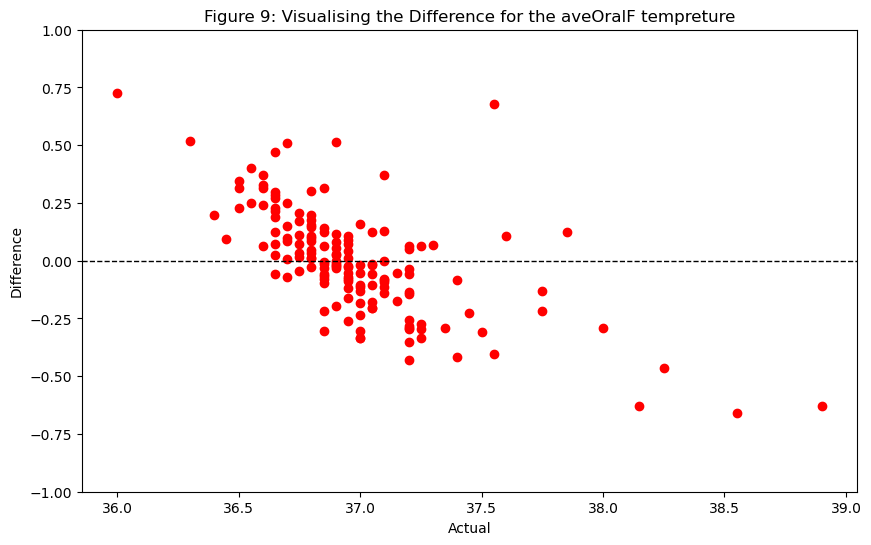

In [734]:
#AVEORALF Difference:
pred = mlp_aveOralF.predict(X_test)
acc = np.array(y_test['aveOralF'])
fig9(pred,acc,9)

5/5 [==============================] - 0s 2ms/step


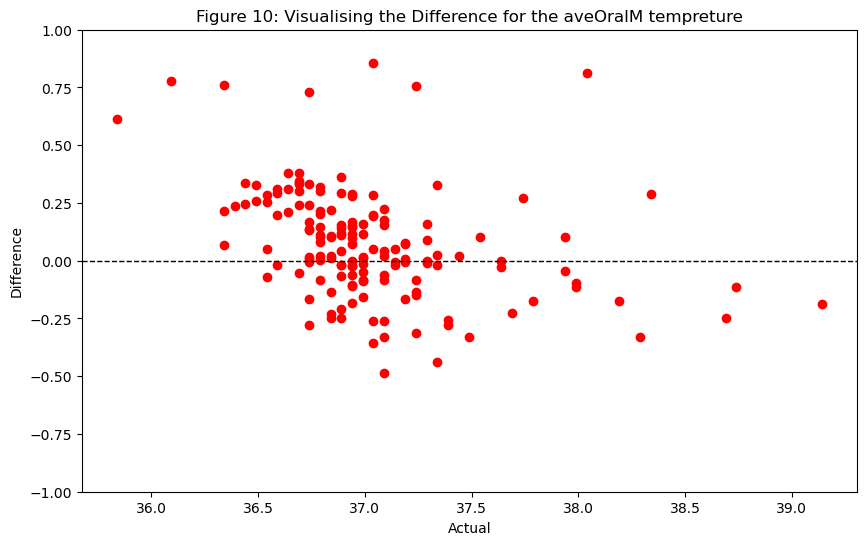

In [735]:
#AVEORALM Difference:
pred = mlp_aveOralM.predict(X_test)
acc = np.array(y_test['aveOralM'])
fig9(pred,acc,10)

## 4.5.1 Categorical Columns Droped Best Model:
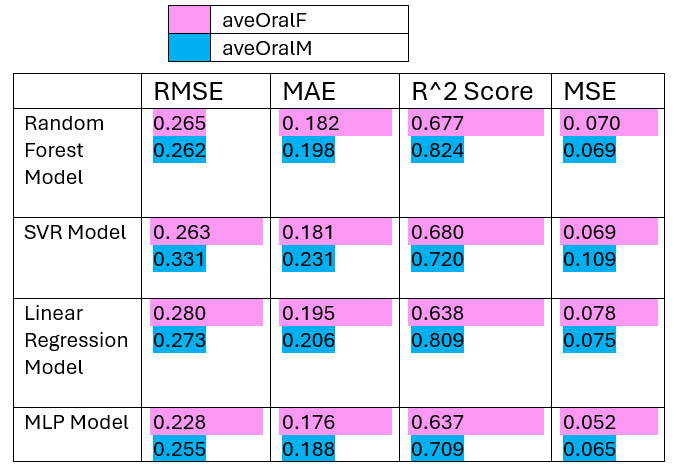

- From the Figure above I can determine the winner for each metrics. 
- Lowest RMSE was computed by the MLP Model (for both Fast Mode and Monitor Mode). MLP has the lowest Fast Mode RMSE however, as for the Monitor mode the RMSE values are quite similar throughout all the models.
- Lowest MAE was computed by by the MLP.MLP Model computes the lowest MAE but as for the Fast mode, the figures are quite close together throughout all the models.
- Highest R^2 score was achieved by Random Forest Model. Dispite the fact that the Fast mode score was lower than that of the SVM, the average r^2 score was clearly larger of the Random Forest Model
- Lastly, the lowest MSE was computed by the MLP Model, the MLP's Monitor Mode score was quite close to the Random Forest however, MLP's Fast mode score was considerably smaller than RF Model's score - resulting in better peformance.

#### Overall, the best Regression Models for predicting both aveOralF and aveOralM were the Multi Layered Perceptron Models (MLPs) because on average they had a better performance compared to all the other models. MLPs had the lowest RMSE, MAE and MSE but they did achive a lower R^2 Score. However, they outperformed other models in the other three metrics.

## 4.5.2  Categorical Columns Encoded Best Model:
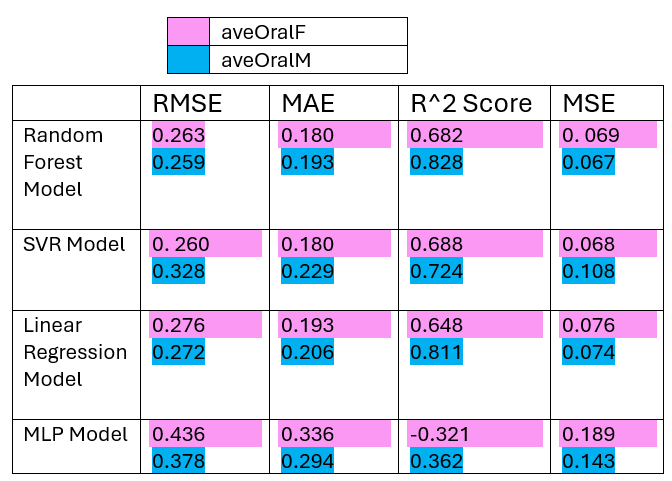

- From the Figure above I can determine the winner for each metrics. 
- For the Fast Mode, it is clear that the best Models were either Random Forest Regression model or the Support Vector Regressor since their metrics are very similar to one another.
- As for the Monitor Mode, the best model was the Random Forest Regressor since it outperformed all of the other models.

- Also its worth noting that the MLP model for the Fast mode performed extremely poor which could be due to the way I developed it. However, due to the time constraints I will not be attempting to improve the MLP model and will move on.

#### Overall, the best Models for both AveOralF and aveOralM was the Random Forest Regressor because it performed consistently well on both Fast mode an Monitor Mode

## 4.5.3 Regression Models Conclusion (Best Model):
### Comparing the MLP Model with the Categorical columns dropped and the Random Forest Regressor with the Categorical columns encoded

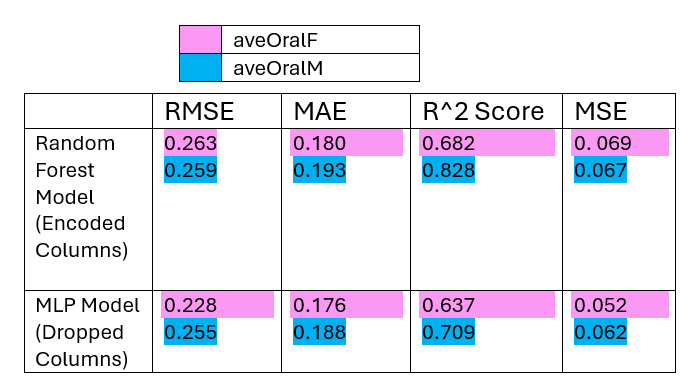

- MLP model outperformed the Random Forest Regression Model in 3/4 metrics therefore the following conclusion can be drawn:

#### MLP Model is the best Regression model, indicating that dropping the categorical columns is a more effective than encoding them.



## 4.6 Adding a Fever No Fever Columns:

### 4.6.1 Preparing for classification task and viewing the data:

In [516]:
def feverCols(df):
    y_fever = df.copy()
    fever_lambda = lambda temperature: 1 if temperature >= 37.5 else 0
    # Applying the lambda function to create binary columns for feverOralF and feverOralM
    y_fever['feverOralF'] = df['aveOralF'].apply(fever_lambda)
    y_fever['feverOralM'] = df['aveOralM'].apply(fever_lambda)
    
    return y_fever


y_fever = y.copy()
y_fever = feverCols(y_fever)

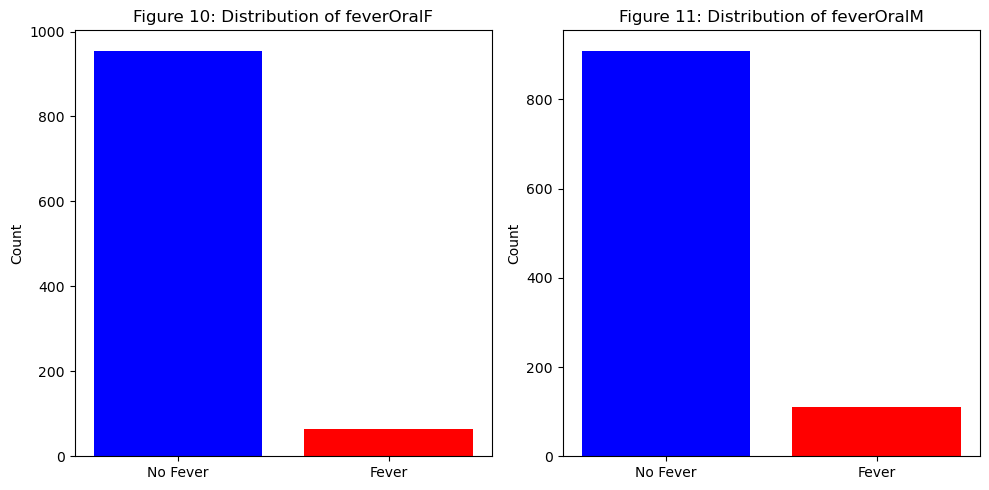

In [517]:
import matplotlib.pyplot as plt

#count the number of fevers and non fevers:
feverOralF_counts = y_fever['feverOralF'].value_counts()
feverOralM_counts = y_fever['feverOralM'].value_counts()

#Ploting the bar chart:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

#Bar chart for feverOralF column:
axs[0].bar(feverOralF_counts.index, feverOralF_counts.values, color=['blue', 'red'])
axs[0].set_title('Figure 10: Distribution of feverOralF')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['No Fever', 'Fever'])
axs[0].set_ylabel('Count')

#Bar chart for feverOralM column:
axs[1].bar(feverOralM_counts.index, feverOralM_counts.values, color=['blue', 'red'])
axs[1].set_title('Figure 11: Distribution of feverOralM')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['No Fever', 'Fever'])
axs[1].set_ylabel('Count')

plt.tight_layout() 
plt.show()


### 4.6.2 Conclusion from the Figures above (Figure 10 and Figure 11):
- The data distribution is uneven - there are more people who do not have a fever than people who do have a fever
- This means that (when classifying) accuracy is not a sufficient way to measure the reliability of my model
- An alternative measure could be f1 score as it is the average between precision and recall. Recall and Precision were not chosen as they prioritise one class over another, in this case both classes are important therefore f1 is solid performance measure.

## 5. Classification (Feaver or No Feaver) (Binary Classificaion Task):

### 5.1 Training a Binary Classifier:
- The reason why I am spliting the data again is because during MLP training, I have created 3 splits: training,validation and test split. Since we have a very small dataset, it would be useful to revert that back to just the training and test split to provide my model with as much training data as possible.

In [748]:
### Checks if the columns have been scaled already and if not it scales them:
for col in X.columns:
    if X[col].std() < 1:
        pass
    else:
        X = scaling(X)#This method can be found at 4.4.2
        break

In [749]:
#adding a Fever no Fever column for both aveOralF and aveOralM:
y_fever = feverCols(y)

#Spliting the data:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_fever, test_size=0.2, random_state=123)
print(X_train.shape)
print(X_test.shape), 
print(y_train.shape)
print(y_test.shape)
X_sample = X.iloc[:5]
print(X_sample)

(816, 30)
(204, 30)
(816, 4)
(204, 4)
      T_atm  Humidity  Distance  T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  \
0  0.426966  0.352827  0.003314   0.373016   0.251248   0.320153     0.453058   
1  0.426966  0.313840  0.003314   0.395382   0.144759   0.101403     0.372093   
2  0.426966  0.313840  0.003314   0.419192   0.389351   0.355867     0.431955   
3  0.426966  0.333333  0.003314   0.438672   0.293955   0.380102     0.450474   
4  0.426966  0.333333  0.003314   0.428571   0.365502   0.393495     0.540913   

   aveAllL13_1     T_RC1  T_RC_Dry1  ...   T_FHCC1   T_FHRC1   T_FHLC1  \
0     0.421769  0.227273   0.254665  ...  0.416049  0.360160  0.311394   
1     0.276818  0.164773   0.177278  ...  0.490947  0.462872  0.366773   
2     0.397174  0.386364   0.404501  ...  0.633745  0.600267  0.542896   
3     0.490842  0.277841   0.301866  ...  0.558025  0.528235  0.544258   
4     0.515960  0.367614   0.362239  ...  0.665021  0.659404  0.497503   

    T_FHBC1   T_FHTC1  T_FH_Ma

In [750]:
#Adding a class weight - our dataset is imbalanced
from sklearn.linear_model import SGDClassifier
class_weights = {0: 0.5, 1: 2} # Experementing with different weights to find the best one
#aveOralF Binary Classifier:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42, class_weight=class_weights)
sgd_clf.fit(X_train, y_train['feverOralF'])
y_pred = sgd_clf.predict(X_test)

In [25]:
#Viewing the Performance metrics
# Now the evaluation metric that I will be judging the model's performance by will be the f1 score 
# for the same reason as stated in Section 4.6.2
from sklearn.metrics import classification_report
report = classification_report(y_test['feverOralF'], y_pred)
print(report) 

KeyError: 'feverOralF'

### 5.1.2 Binary Classifier Grid Search:

In [753]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import make_scorer, f1_score

param_grid = {'max_iter': [1,10,50,100, 250,500, 1000],
              'tol': [1e-4, 1e-3, 0.01]}

#class weight imbalance
class_weights = {0: 0.5, 1: 2}

#Grid search for aveOralF
sgd_clf = SGDClassifier(random_state=42, class_weight=class_weights)
grid_search = GridSearchCV(estimator=sgd_clf, param_grid=param_grid, cv=5, scoring=make_scorer(f1_score, pos_label=1))
grid_search.fit(X_train, y_train['feverOralF'])
print("feverOralF Best Params: ", grid_search.best_params_)

#Grid search for aveOralM
sgd_clf = SGDClassifier(random_state=42, class_weight=class_weights)
grid_search = GridSearchCV(estimator=sgd_clf, param_grid=param_grid, cv=5, scoring=make_scorer(f1_score, pos_label=1))
grid_search.fit(X_train, y_train['feverOralM'])
print("feverOralM Best Params: ", grid_search.best_params_)


C:\Users\Dima\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Dima\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Dima\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Dima\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Dima\anaconda3\Lib\site-packages\sklearn\linear_model\_

feverOralF Best Params:  {'max_iter': 10, 'tol': 0.0001}
feverOralM Best Params:  {'max_iter': 50, 'tol': 0.0001}


In [754]:
#Fast Mode Fever:
from sklearn.linear_model import SGDClassifier
class_weights = {0: 0.5, 1: 2} # Experementing with different weights to find the best one
#aveOralF Binary Classifier:
sgd_clf = SGDClassifier(max_iter=50, tol=0.0001, random_state=42, class_weight=class_weights)
sgd_clf.fit(X_train, y_train['feverOralF'])
y_pred = sgd_clf.predict(X_test)

from sklearn.metrics import classification_report
report = classification_report(y_test['feverOralF'], y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       181
           1       0.88      0.91      0.89        23

    accuracy                           0.98       204
   macro avg       0.93      0.95      0.94       204
weighted avg       0.98      0.98      0.98       204



### 5.1.3 Binary Classifier ROC Curves for both Fast and Monitor Modes:

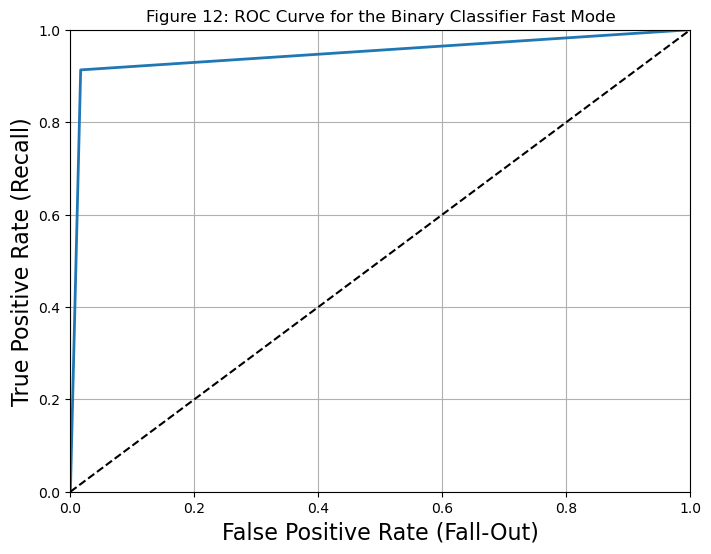

In [653]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#Computing ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test['feverOralF'], y_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))   
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1]) 
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.title(label)
    plt.grid(True) 
    plt.show()                                
plot_roc_curve(fpr, tpr, 'Figure 12: ROC Curve for the Binary Classifier Fast Mode')



In [654]:
from sklearn.linear_model import SGDClassifier
class_weights = {0: 0.5, 1: 2} # Experementing with different weights to find the best one
#fever OralM Binary Classifier:
sgd_clf = SGDClassifier(max_iter=1, tol=0.0001, random_state=42, class_weight=class_weights)
sgd_clf.fit(X_train, y_train['feverOralM'])
y_pred = sgd_clf.predict(X_test)

from sklearn.metrics import classification_report
report = classification_report(y_test['feverOralM'], y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.98      0.94      0.96       174
           1       0.73      0.90      0.81        30

    accuracy                           0.94       204
   macro avg       0.86      0.92      0.88       204
weighted avg       0.94      0.94      0.94       204



C:\Users\Dima\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


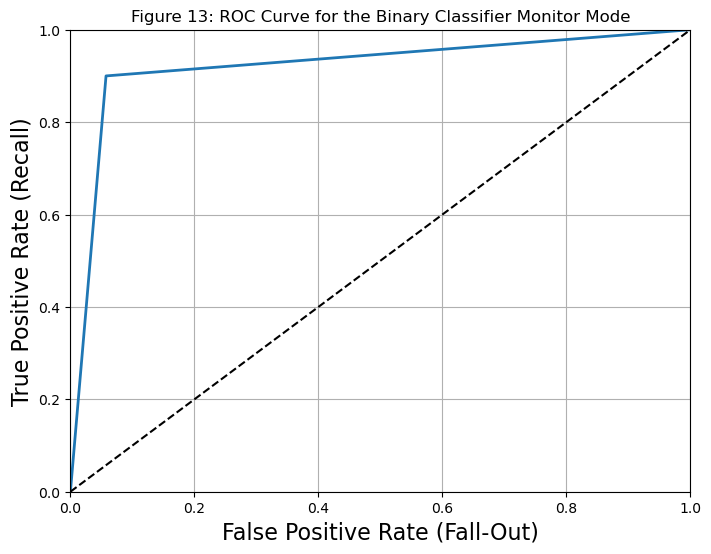

In [655]:

#Computing ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test['feverOralM'], y_pred)
plot_roc_curve(fpr, tpr, 'Figure 13: ROC Curve for the Binary Classifier Monitor Mode')

### 5.1.4 Binary Classifier Conclusion:
- The Binary Classifier classified the fast Mode data better than the Monitor mode data as shown in the ROC Curve Figures 12 and 13

- The Metrics were the following:

- F1 Scores on Fast Mode:
1. Class 0 F1 Score: 0.99
2. Class 1 F1 Score: 0.89

- F1 Scores on Monitor Mode:
1. Class 0 F1 Score: 0.96
2. Class 1 F1 Score: 0.81

### 5.2.1 Training an XGBoost Model for Classification:

In [658]:
#XGBoost with default hyperparameters:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report

#Fast Mode:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train['feverOralF'])

y_pred = xgb_model.predict(X_test)
print(classification_report(y_test['feverOralF'], y_pred))

print("\n")

#Monitor Mode:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train['feverOralM'])

y_pred = xgb_model.predict(X_test)
print(classification_report(y_test['feverOralM'], y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       181
           1       0.85      0.74      0.79        23

    accuracy                           0.96       204
   macro avg       0.91      0.86      0.88       204
weighted avg       0.95      0.96      0.95       204



              precision    recall  f1-score   support

           0       0.97      0.98      0.98       174
           1       0.89      0.83      0.86        30

    accuracy                           0.96       204
   macro avg       0.93      0.91      0.92       204
weighted avg       0.96      0.96      0.96       204



### 5.2.2 GridSearch for the best Hyperparameters: 
- Figures 14 and 15 show an interesting pattern, while Fast mode's score varies with the scale pos value, Monitor Mode's Score stays the same. The selected scale pos value will be 2.

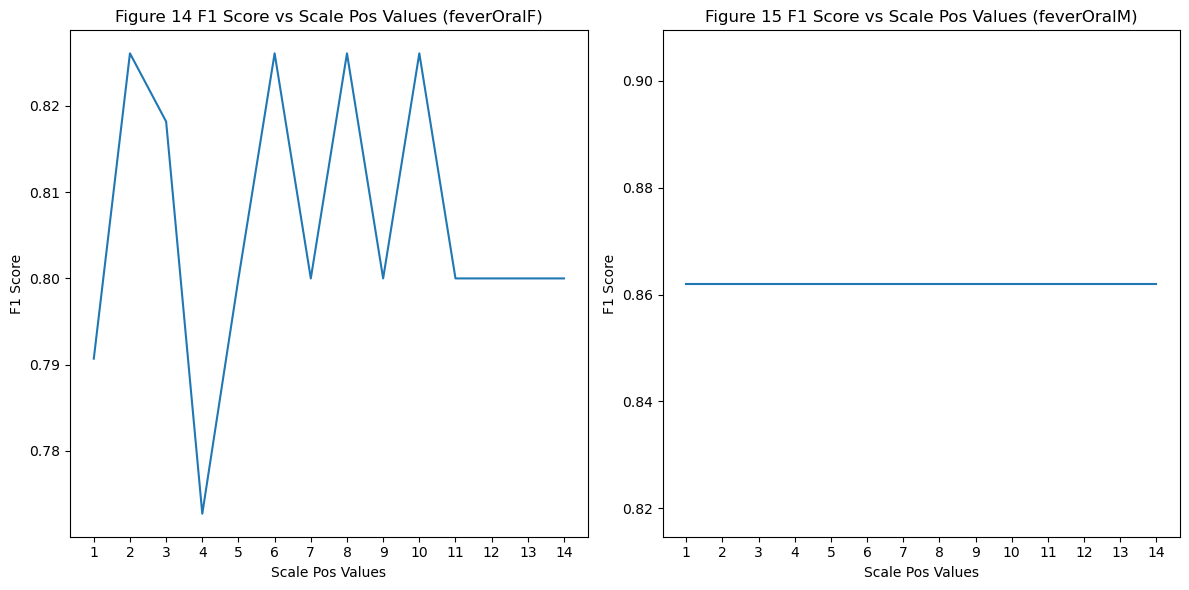

In [676]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# XGBoost:
#Imballanced dataset - scale pos is an important hyperparameter
# Played around with a couple of values - the best one turned out to be 4:

values = list(range(1, 15))

f1_scoresF = []
f1_scoresM = []
for val in values:
    xgb_model = XGBClassifier(scale_pos_weight=val)
    
    xgb_model.fit(X_train, y_train['feverOralM'])
    y_pred = xgb_model.predict(X_test)
    
    f1_scoresM.append(f1_score(y_test['feverOralM'], y_pred))
    
    xgb_model.fit(X_train, y_train['feverOralF'])
    y_pred = xgb_model.predict(X_test)
    
    f1_scoresF.append(f1_score(y_test['feverOralF'], y_pred))

#Graphs:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
#F1 Score for feverOralF
axes[0].plot(values, f1_scoresF)
axes[0].set_xlabel('Scale Pos Values')
axes[0].set_ylabel('F1 Score')
axes[0].set_title('Figure 14 F1 Score vs Scale Pos Values (feverOralF)')
axes[0].set_xticks(values)

#F1 Score for feverOralM
axes[1].plot(values, f1_scoresM)
axes[1].set_xlabel('Scale Pos Values')
axes[1].set_ylabel('F1 Score')
axes[1].set_title('Figure 15 F1 Score vs Scale Pos Values (feverOralM)')
axes[1].set_xticks(values)

plt.tight_layout()
plt.show()

#Selected Value is 2.

### 5.2.3 Tuning: Max Depth, min child weight and gamma:

- Fast Mode: F1 Score has increased by 1%
- Monitor Mode: No changes observed

In [678]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, f1_score

#Parameter Grid:
param_grid = {
    'max_depth': range(3, 10),
    'min_child_weight': range(1, 6),
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# Grid Search function to optimise the xgboost classifier:
gsearch = GridSearchCV(
    estimator=XGBClassifier(
        scale_pos_weight=2),
    param_grid=param_grid,
    scoring=make_scorer(f1_score, pos_label=1),
    n_jobs=-1,
    cv=5
)

#fitting GridSearch:
gsearch.fit(X_train, y_train['feverOralF'])
#Displaying Results:
print("Best parameters:", gsearch.best_params_)
print("Best score:", gsearch.best_score_)

print("\n")

gsearch.fit(X_train, y_train['feverOralM'])
#Displaying Results:
print("Best parameters:", gsearch.best_params_)
print("Best score:", gsearch.best_score_)

Best parameters: {'gamma': 0.2, 'max_depth': 3, 'min_child_weight': 4}
Best score: 0.6628654970760234


Best parameters: {'gamma': 0, 'max_depth': 7, 'min_child_weight': 2}
Best score: 0.7989877267296623


In [680]:
#XGBoost with updated hyperparameters
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report

#Fast Mode:
xgb_model = XGBClassifier(scale_pos_weight=2,
                          max_depth=3,
                          min_child_weight=4,
                          gamma=0.2
                         )
xgb_model.fit(X_train, y_train['feverOralF'])

y_pred = xgb_model.predict(X_test)
print(classification_report(y_test['feverOralF'], y_pred))

print("\n")

#Monitor Mode:
xgb_model = XGBClassifier(scale_pos_weight=2,
                          max_depth=7,
                          min_child_weight=2,
                          gamma=0
                         )
xgb_model.fit(X_train, y_train['feverOralM'])

y_pred = xgb_model.predict(X_test)
print(classification_report(y_test['feverOralM'], y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       181
           1       0.82      0.78      0.80        23

    accuracy                           0.96       204
   macro avg       0.90      0.88      0.89       204
weighted avg       0.96      0.96      0.96       204



              precision    recall  f1-score   support

           0       0.97      0.98      0.98       174
           1       0.89      0.83      0.86        30

    accuracy                           0.96       204
   macro avg       0.93      0.91      0.92       204
weighted avg       0.96      0.96      0.96       204



### 5.2.4 Tuning: n_estimators, subsample, colsample_bytree & learning rate:

- Fast Mode: F1 Score again increased by 1%
- Monitor Mode: No changes observed

In [683]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, f1_score

#Parameter Grid:
param_grid = {
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [100,200, 300],
    'eta':[0.001, 0.01, 0.1, 0.5]
}

# Grid Search function to optimise the xgboost classifier:
gsearch = GridSearchCV(
    estimator= XGBClassifier(
        scale_pos_weight=2,
        max_depth=3,
        min_child_weight=4,
        gamma=0.2),
    param_grid=param_grid,
    scoring=make_scorer(f1_score, pos_label=1),
    n_jobs=-1,
    cv=5
)

#fitting GridSearch:
gsearch.fit(X_train, y_train['feverOralF'])
#Displaying Results:
print("Best parameters:", gsearch.best_params_)
print("Best score:", gsearch.best_score_)

print("\n")


gsearch_two = GridSearchCV(
    estimator= XGBClassifier(
        scale_pos_weight=2,
        max_depth=7,
        min_child_weight=2,
        gamma=0),
    param_grid=param_grid,
    scoring=make_scorer(f1_score, pos_label=1),
    n_jobs=-1,
    cv=5
)

gsearch_two.fit(X_train, y_train['feverOralM'])
#Displaying Results:
print("Best parameters:", gsearch_two.best_params_)
print("Best score:", gsearch_two.best_score_)

Best parameters: {'colsample_bytree': 0.6, 'eta': 0.001, 'n_estimators': 100, 'subsample': 0.6}
Best score: 0.7107879994102905


Best parameters: {'colsample_bytree': 0.6, 'eta': 0.1, 'n_estimators': 200, 'subsample': 0.8}
Best score: 0.8149555903866249


In [690]:
#XGBoost with updated hyperparameters
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report

#Fast Mode:
xgb_model = XGBClassifier(scale_pos_weight=2,
                          max_depth=3,
                          min_child_weight=4,
                          gamma=0.2,
                          subsample=1,
                          colsample_bytree=1,
                          n_estimators=100,
                          eta=0.001
                         )
xgb_model.fit(X_train, y_train['feverOralF'])

y_pred = xgb_model.predict(X_test)
print(classification_report(y_test['feverOralF'], y_pred))

print("\n")

#Monitor Mode:
xgb_model = XGBClassifier(scale_pos_weight=2,
                          max_depth=7,
                          min_child_weight=2,
                          gamma=0,
                          subsample=1,
                          colsample_bytree=1,
                          n_estimators=100,
                          eta=0.1
                         )
xgb_model.fit(X_train, y_train['feverOralM'])

y_pred = xgb_model.predict(X_test)
print(classification_report(y_test['feverOralM'], y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       181
           1       0.89      0.74      0.81        23

    accuracy                           0.96       204
   macro avg       0.93      0.86      0.89       204
weighted avg       0.96      0.96      0.96       204



              precision    recall  f1-score   support

           0       0.97      0.98      0.98       174
           1       0.89      0.83      0.86        30

    accuracy                           0.96       204
   macro avg       0.93      0.91      0.92       204
weighted avg       0.96      0.96      0.96       204



### 5.2.5 Final XGBoost Models ROC Curves:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       181
           1       0.89      0.74      0.81        23

    accuracy                           0.96       204
   macro avg       0.93      0.86      0.89       204
weighted avg       0.96      0.96      0.96       204



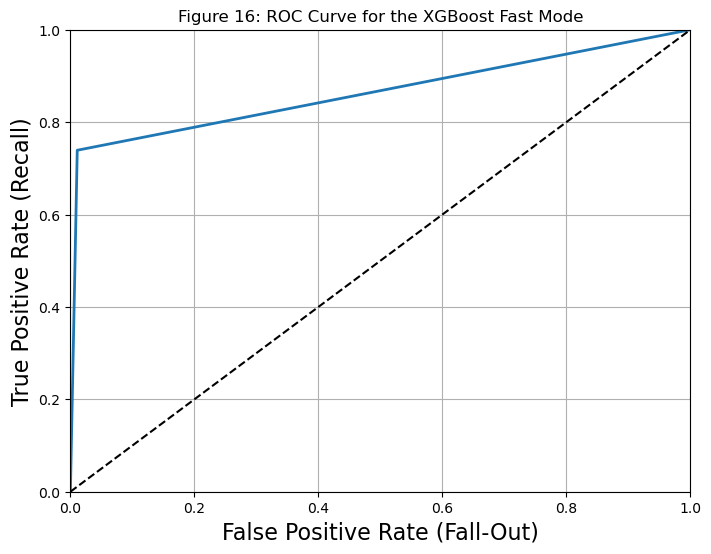

In [691]:
#XGBoost with updated hyperparameters
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report

#Fast Mode:
xgb_model = XGBClassifier(scale_pos_weight=2,
                          max_depth=3,
                          min_child_weight=4,
                          gamma=0.2,
                          subsample=1,
                          colsample_bytree=1,
                          n_estimators=100,
                          eta=0.001
                         )
xgb_model.fit(X_train, y_train['feverOralF'])

y_pred = xgb_model.predict(X_test)
print(classification_report(y_test['feverOralF'], y_pred))

#Computing ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test['feverOralF'], y_pred)
plot_roc_curve(fpr, tpr, 'Figure 16: ROC Curve for the XGBoost Fast Mode')

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       174
           1       0.89      0.83      0.86        30

    accuracy                           0.96       204
   macro avg       0.93      0.91      0.92       204
weighted avg       0.96      0.96      0.96       204



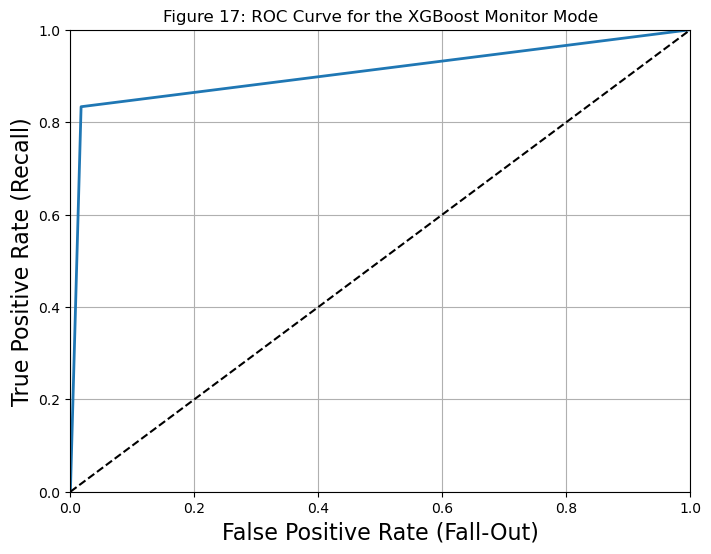

In [692]:
#Monitor Mode:
xgb_model = XGBClassifier(scale_pos_weight=2,
                          max_depth=7,
                          min_child_weight=2,
                          gamma=0,
                          subsample=1,
                          colsample_bytree=1,
                          n_estimators=100,
                          eta=0.1
                         )
xgb_model.fit(X_train, y_train['feverOralM'])

y_pred = xgb_model.predict(X_test)
print(classification_report(y_test['feverOralM'], y_pred))

#Computing ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test['feverOralM'], y_pred)
plot_roc_curve(fpr, tpr, 'Figure 17: ROC Curve for the XGBoost Monitor Mode')

### 5.2.6 XGBoost Classifier Conclusion:
- The XGBoost Classifier classified the Monitor Mode data better than the Fast mode data as shown in the ROC Curve Figures 16 and 17

- The Metrics were the following:

- F1 Scores on Fast Mode:
1. Class 0 F1 Score: 0.98
2. Class 1 F1 Score: 0.81

- F1 Scores on Monitor Mode:
1. Class 0 F1 Score: 0.98
2. Class 1 F1 Score: 0.86

## 5.3 Classification Model Conclusion (Best Model for Monitor Mode and Fast Mode):

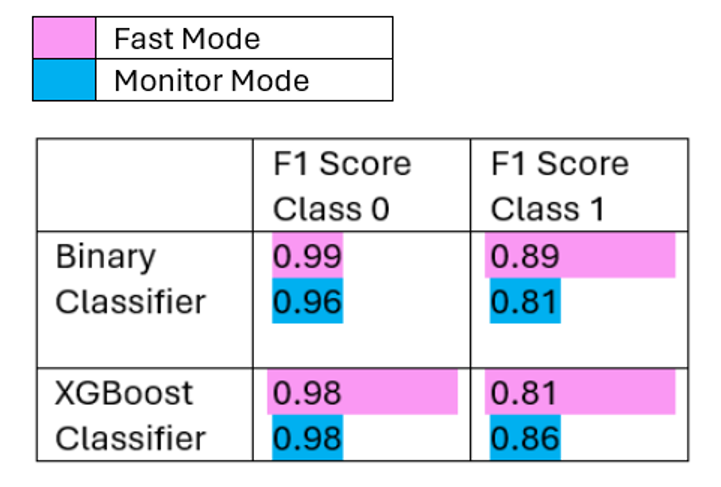

- From the Figure above it is clear that the Binary Classifier is much better at predicting Fast Mode and XGBoost Classifier is better at classifying Monitor Mode data.

#### Best Classification Model for Fast Mode - Binary Classifier
#### Best Classification Model for  Monitor Mode - XGBoost Classifier


## 6 Conclusion (Best Model Overall):

### 6.1 Generating the F1 Scores for the MLP Models:

In [756]:
#Get the Regression Model Tempreture Values:
mlp_aveOralF
y_predF = (mlp_aveOralF.predict(X_test)).flatten()
mlp_aveOralM
y_predM = (mlp_aveOralM.predict(X_test)).flatten()

#Convert the Tempreture Values into Fever/No Fever Columns:
fever_lambda = lambda temperature: 1 if temperature >= 37.5 else 0
y_feverF = pd.Series(y_predF).apply(fever_lambda)
y_feverM = pd.Series(y_predM).apply(fever_lambda)

#Converting the y_test Tempretures to Fever/No Fever Columns:
y_test = feverCols(y_test)

7/7 [==============================] - 0s 2ms/step


In [761]:
#Displaying the F1 Scores of the Fast Mode and Monitor Mode MLP Predictions:
from sklearn.metrics import classification_report
print("MLP Fast Mode Report")
report = classification_report(y_test['feverOralF'], y_feverF)
print(report)
print("\n")
print("MLP Monitor Mode Report")
report = classification_report(y_test['feverOralM'], y_feverM)
print(report)


MLP Fast Mode Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       181
           1       0.91      0.87      0.89        23

    accuracy                           0.98       204
   macro avg       0.95      0.93      0.94       204
weighted avg       0.98      0.98      0.98       204



MLP Monitor Mode Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       174
           1       0.90      0.90      0.90        30

    accuracy                           0.97       204
   macro avg       0.94      0.94      0.94       204
weighted avg       0.97      0.97      0.97       204



### 6.2 Comparing The Models:
- I made sure to test all of the models on the same dataset

In [1]:
y_train = feverCols(y_train)

NameError: name 'feverCols' is not defined

In [760]:
#Getting the f1 Scores on the Same Dataset:
from sklearn.metrics import classification_report

print("Binary Classifier Report")
#Fast Mode Binary Classifier:
from sklearn.linear_model import SGDClassifier
class_weights = {0: 0.5, 1: 2} # Experementing with different weights to find the best one
#aveOralF Binary Classifier:
sgd_clf = SGDClassifier(max_iter=50, tol=0.0001, random_state=42, class_weight=class_weights)
sgd_clf.fit(X_train, y_train['feverOralF'])
y_pred = sgd_clf.predict(X_test)
report = classification_report(y_test['feverOralF'], y_pred)
print(report)

print("XGBoost Classifier Report")
#Monitor Mode XGBoost:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(scale_pos_weight=2,
                          max_depth=7,
                          min_child_weight=2,
                          gamma=0,
                          subsample=1,
                          colsample_bytree=1,
                          n_estimators=100,
                          eta=0.1
                         )
xgb_model.fit(X_train, y_train['feverOralM'])

y_pred = xgb_model.predict(X_test)
print(classification_report(y_test['feverOralM'], y_pred))

Binary Classifier Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       181
           1       0.88      0.91      0.89        23

    accuracy                           0.98       204
   macro avg       0.93      0.95      0.94       204
weighted avg       0.98      0.98      0.98       204

XGBoost Classifier Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       174
           1       0.89      0.83      0.86        30

    accuracy                           0.96       204
   macro avg       0.93      0.91      0.92       204
weighted avg       0.96      0.96      0.96       204



### Fast Mode Models Comparision:
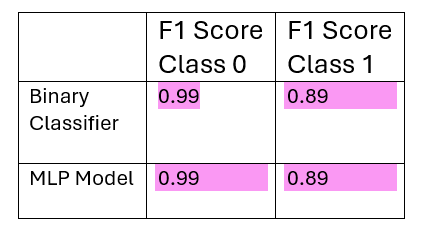

### Monitor Mode Models Comparision:
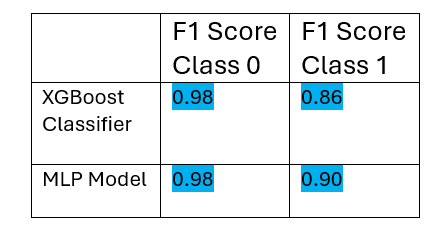


## Conclusion:

- From the table above it is clear that both the MLP and the Binary Classifier Models are fine to use in order to predict whether a person has a fever or not in Fast Mode
- As for Monitor Mode, the MLP model has a slightly higher metric when predicting Class 1 therefore the MLP model would be my choice over the XGBoost

### Best Model For Fast Mode: MLP OR Binary Classifier
#### Binary Classifier/MLP F1 Scores were 99% for Class 0 and 89% for Class 1
#### The size of my test set was 204 records: 181 for Class 0 and 23 for Class 1
#### The F1 percentage scores meant that the model predicted correctly 179/181 for class 0 and 20/23 for class 1

### Best Model For Monitor Mode: MLP
#### MLP F1 Scores were 98% for Class 0 and 90% for Class 1
#### The size of my test set was 204 records: 181 for Class 0 and 23 for Class 1
#### The F1 percentage scores meant that the model predicted correctly 179/181 for class 0 and 20/23 for class 1